In [501]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
data = pd.read_csv("forecasting_case_study.csv")
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2/5/2017,27750,0%,0,0,0,0.0,0,0,0,0
1,SKU1,2/12/2017,29023,0%,1,0,1,0.0,0,1,0,0
2,SKU1,2/19/2017,45630,17%,0,0,0,0.0,0,0,0,0
3,SKU1,2/26/2017,26789,0%,1,0,1,0.0,0,0,0,0
4,SKU1,3/5/2017,41999,17%,0,0,0,0.0,0,0,0,0


In [503]:
# Check NA values
data.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

In [504]:
# Convert Date of Travel to datetime
data["date"] = pd.to_datetime(data["date"])

In [505]:
data['Price Discount (%)'] = data['Price Discount (%)'].str.replace('%', '').astype(float)

In [506]:
def check_type(data):
    for column in data.columns:
        print(f"Column:{column}, Type:{data[column].dtype}")

check_type(data)

Column:Product, Type:object
Column:date, Type:datetime64[ns]
Column:Sales, Type:int64
Column:Price Discount (%), Type:float64
Column:In-Store Promo, Type:int64
Column:Catalogue Promo, Type:int64
Column:Store End Promo, Type:int64
Column:Google_Mobility, Type:float64
Column:Covid_Flag, Type:int64
Column:V_DAY, Type:int64
Column:EASTER, Type:int64
Column:CHRISTMAS, Type:int64


In [507]:
# Check whether duplicated rows exist
data[data.duplicated()]

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [508]:
# Descriptive Analysis
drop_col = ["Product","date"]
describe_data = data.drop(drop_col, axis = 1)
describe_data.describe()

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,25.104269,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,21.549350,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,40.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,83.000000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


In [509]:
def numeric_outlier(column):
    mean = column.mean()
    std = column.std()
    threshold = 3
    z_score = (column - mean)/std
    outlier = data[np.abs(z_score) > threshold]
    return outlier  #True for outliers

price_discount = numeric_outlier(data["In-Store Promo"])
price_discount

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [510]:
cata_promo = numeric_outlier(data["Catalogue Promo"])
cata_promo

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [511]:
end_promo = numeric_outlier(data["Store End Promo"])
end_promo

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [512]:
google_mob = numeric_outlier(data["Google_Mobility"])
google_mob
# We can find that these outliers are concentrated in April 2020. 
# Since these outliers aren't randomly distributed, it is reasonable there are some specific reasons that why google mobility in this month was much lower than others. (It is better to investigate the reasons in reality)
# Therefore, I wouldn't delete these outliers

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
164,SKU1,2020-03-29,43707,1.0,0,0,0,-26.63,1,0,0,0
165,SKU1,2020-04-05,39473,1.0,0,1,0,-28.49,1,0,0,0
166,SKU1,2020-04-12,64685,17.0,0,0,0,-27.30,1,0,1,0
167,SKU1,2020-04-19,39290,2.0,1,0,1,-24.28,1,0,0,0
168,SKU1,2020-04-26,46829,17.0,0,0,0,-22.58,1,0,0,0
184,SKU1,2020-08-16,23744,1.0,0,0,0,-20.35,1,0,0,0
368,SKU2,2020-03-29,4258,1.0,0,0,0,-26.63,1,0,0,0
369,SKU2,2020-04-05,3719,1.0,0,0,0,-28.49,1,0,0,0
370,SKU2,2020-04-12,2914,1.0,0,0,0,-27.30,1,0,1,0
371,SKU2,2020-04-19,3275,1.0,0,0,0,-24.28,1,0,0,0


In [513]:
covid_flag = numeric_outlier(data["Covid_Flag"])
covid_flag

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS


In [514]:
v_day = numeric_outlier(data["V_DAY"])
v_day

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
1,SKU1,2017-02-12,29023,0.0,1,0,1,0.0,0,1,0,0
53,SKU1,2018-02-11,33604,0.0,1,0,1,0.0,0,1,0,0
105,SKU1,2019-02-10,29867,0.0,1,0,1,0.0,0,1,0,0
158,SKU1,2020-02-16,45572,17.0,0,0,0,3.3,1,1,0,0
205,SKU2,2017-02-12,7080,25.0,0,0,0,0.0,0,1,0,0
257,SKU2,2018-02-11,32549,50.0,1,0,0,0.0,0,1,0,0
309,SKU2,2019-02-10,2837,0.0,0,0,0,0.0,0,1,0,0
362,SKU2,2020-02-16,2857,1.0,1,0,0,3.3,1,1,0,0
409,SKU3,2017-02-12,49090,30.0,1,0,0,0.0,0,1,0,0
461,SKU3,2018-02-11,14822,0.0,0,1,1,0.0,0,1,0,0


In [515]:
easter = numeric_outlier(data["EASTER"])
easter

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
9,SKU1,2017-04-09,54655,17.0,1,0,0,0.0,0,0,1,0
61,SKU1,2018-04-08,35136,0.0,0,0,0,0.0,0,0,1,0
113,SKU1,2019-04-07,55859,17.0,1,0,0,0.0,0,0,1,0
166,SKU1,2020-04-12,64685,17.0,0,0,0,-27.3,1,0,1,0
213,SKU2,2017-04-09,3084,3.0,0,0,0,0.0,0,0,1,0
265,SKU2,2018-04-08,17970,50.0,1,0,0,0.0,0,0,1,0
317,SKU2,2019-04-07,2749,3.0,1,0,0,0.0,0,0,1,0
370,SKU2,2020-04-12,2914,1.0,0,0,0,-27.3,1,0,1,0
417,SKU3,2017-04-09,58678,30.0,1,0,0,0.0,0,0,1,0
469,SKU3,2018-04-08,63779,40.0,1,0,1,0.0,0,0,1,0


In [516]:
christmas = numeric_outlier(data["CHRISTMAS"])
christmas

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
43,SKU1,2017-12-03,66333,17.0,1,0,0,0.00,0,0,0,1
95,SKU1,2018-12-02,59037,17.0,0,1,1,0.00,0,0,0,1
147,SKU1,2019-12-01,73956,17.0,0,1,0,0.00,0,0,0,1
202,SKU1,2020-12-20,0,15.0,1,0,1,-10.27,1,0,0,1
247,SKU2,2017-12-03,6270,25.0,1,0,0,0.00,0,0,0,1
299,SKU2,2018-12-02,2781,0.0,1,0,0,0.00,0,0,0,1
351,SKU2,2019-12-01,7690,25.0,1,0,0,0.00,0,0,0,1
406,SKU2,2020-12-20,0,25.0,0,0,0,-10.27,1,0,0,1
451,SKU3,2017-12-03,62176,40.0,1,0,1,0.00,0,0,0,1
503,SKU3,2018-12-02,16673,2.0,1,0,1,0.00,0,0,0,1


In [517]:
# Variables: V_DAY, EASTER, CHRISTMAS are reasonable to have outliers around the holidays, so I wouldn't delete these outliers.

## Interpreting Skewness Values
#### Skewness = 0: The data are perfectly symmetrical.
#### Skewness > 0: The data are skewed to the right (positive skew). The right tail is longer or fatter than the left tail. Most of the data are concentrated on the left.
#### Skewness < 0: The data are skewed to the left (negative skew). The left tail is longer or fatter than the right tail. Most of the data are concentrated on the right.

In [518]:
def skew(column):
    num = column.skew()
    return num

In [519]:
skew(data["Sales"])

2.945586493105923

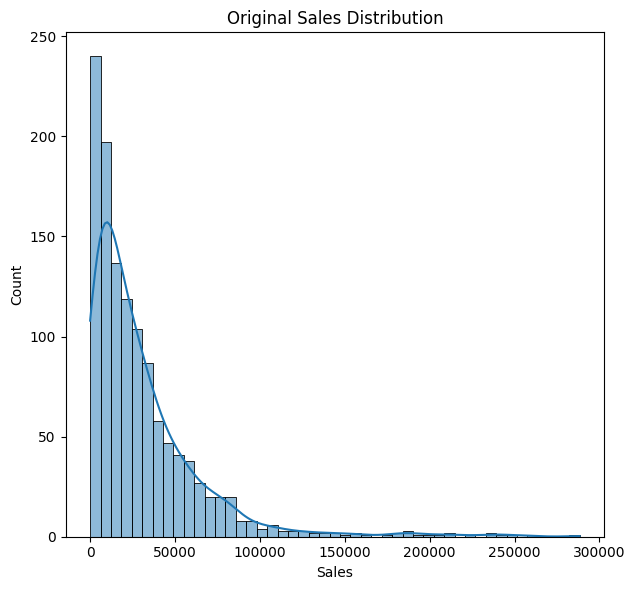

In [520]:
plt.figure(figsize=(12, 6))

# Original 'Sales' distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Sales'], kde=True)
plt.title('Original Sales Distribution')
plt.xlabel('Sales')

plt.tight_layout()
plt.show()

In [521]:
skew(data["Price Discount (%)"])

0.4682949419034937

In [522]:
skew(data["In-Store Promo"])

0.11197082090784266

In [523]:
skew(data["Catalogue Promo"])

1.4062878115950632

In [524]:
skew(data["Store End Promo"])

0.634676061891439

In [525]:
skew(data["Google_Mobility"])

-2.544436025945939

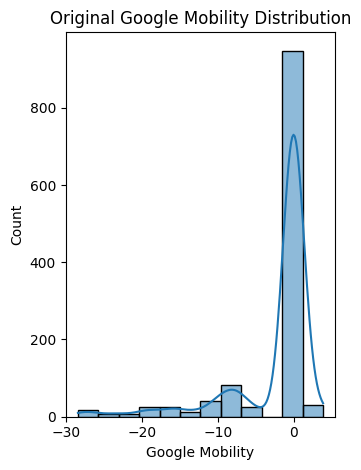

In [526]:
# Original 'Google_Mobility' distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Google_Mobility'], kde=True)
plt.title('Original Google Mobility Distribution')
plt.xlabel('Google Mobility')

plt.tight_layout()
plt.show()

In [527]:
skew(data["Covid_Flag"])

1.3077646537185217

In [528]:
skew(data["V_DAY"])
#reasonable to have skewness due to specific holidays

6.920116977461381

In [529]:
skew(data["EASTER"])
#reasonable to have skewness due to specific holidays

6.920116977461381

In [530]:
skew(data["CHRISTMAS"])
#reasonable to have skewness due to specific holidays

7.0780740091502485

In [531]:
# Varubles Sales and Google_Mobility should be transformed due to high skewness
data['Sales_log'] = np.log(data['Sales'] + 1)
data['Google_Mobility_reflect_log'] = np.log(-data['Google_Mobility'] + abs(data['Google_Mobility'].min()) + 1)

data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_log,Google_Mobility_reflect_log
0,SKU1,2017-02-05,27750,0.0,0,0,0,0.00,0,0,0,0,10.231027,3.384051
1,SKU1,2017-02-12,29023,0.0,1,0,1,0.00,0,1,0,0,10.275878,3.384051
2,SKU1,2017-02-19,45630,17.0,0,0,0,0.00,0,0,0,0,10.728343,3.384051
3,SKU1,2017-02-26,26789,0.0,1,0,1,0.00,0,0,0,0,10.195784,3.384051
4,SKU1,2017-03-05,41999,17.0,0,0,0,0.00,0,0,0,0,10.645425,3.384051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,54.0,0,1,0,-7.56,1,0,0,0,11.478541,3.612268
1214,SKU6,2020-10-25,115798,52.0,0,1,0,-8.39,1,0,0,0,11.659611,3.634423
1215,SKU6,2020-11-01,152186,54.0,1,0,1,-7.43,1,0,0,0,11.932865,3.608753
1216,SKU6,2020-11-08,26445,44.0,1,0,1,-5.95,1,0,0,0,10.182860,3.567841


## Normalization and Standardization

In [532]:
# Initialize the standard scaler
standard_scaler = StandardScaler()

# Sandardize the transformed columns
data['Sales_standardized'] = standard_scaler.fit_transform(data[['Sales_log']])
data['Google_Mobility_standardized'] = standard_scaler.fit_transform(data[['Google_Mobility_reflect_log']])

# Initialize the Min-Max scaler
minmax_scaler = MinMaxScaler()

# Normalize 'Price Discount (%)'
data['Price Discount (%)'] = minmax_scaler.fit_transform(data[['Price Discount (%)']])

# Drop the intermediate transformation columns
data.drop(['Sales_log', 'Google_Mobility_reflect_log'], axis=1, inplace=True)

data[['Sales_standardized', 'Google_Mobility_standardized', 'Price Discount (%)']].describe()

,Sales_standardized,Google_Mobility_standardized,Price Discount (%)
count,1.218000e+03,1.218000e+03,1218.000000
mean,-2.391811e-16,1.767606e-15,0.302461
std,1.000411e+00,1.000411e+00,0.259631
min,-5.180876e+00,-1.346665e+00,0.000000
25%,-3.775747e-01,-4.204763e-01,0.024096
50%,1.667918e-01,-4.204763e-01,0.301205
75%,5.523736e-01,-4.204763e-01,0.481928
max,1.616519e+00,3.993686e+00,1.000000


In [533]:
data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_standardized,Google_Mobility_standardized
0,SKU1,2017-02-05,27750,0.000000,0,0,0,0.00,0,0,0,0,0.350880,-0.420476
1,SKU1,2017-02-12,29023,0.000000,1,0,1,0.00,0,1,0,0,0.375130,-0.420476
2,SKU1,2017-02-19,45630,0.204819,0,0,0,0.00,0,0,0,0,0.619771,-0.420476
3,SKU1,2017-02-26,26789,0.000000,1,0,1,0.00,0,0,0,0,0.331825,-0.420476
4,SKU1,2017-03-05,41999,0.204819,0,0,0,0.00,0,0,0,0,0.574939,-0.420476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,0.650602,0,1,0,-7.56,1,0,0,0,1.025391,1.069638
1214,SKU6,2020-10-25,115798,0.626506,0,1,0,-8.39,1,0,0,0,1.123293,1.214296
1215,SKU6,2020-11-01,152186,0.650602,1,0,1,-7.43,1,0,0,0,1.271037,1.046688
1216,SKU6,2020-11-08,26445,0.530120,1,0,1,-5.95,1,0,0,0,0.324837,0.779556


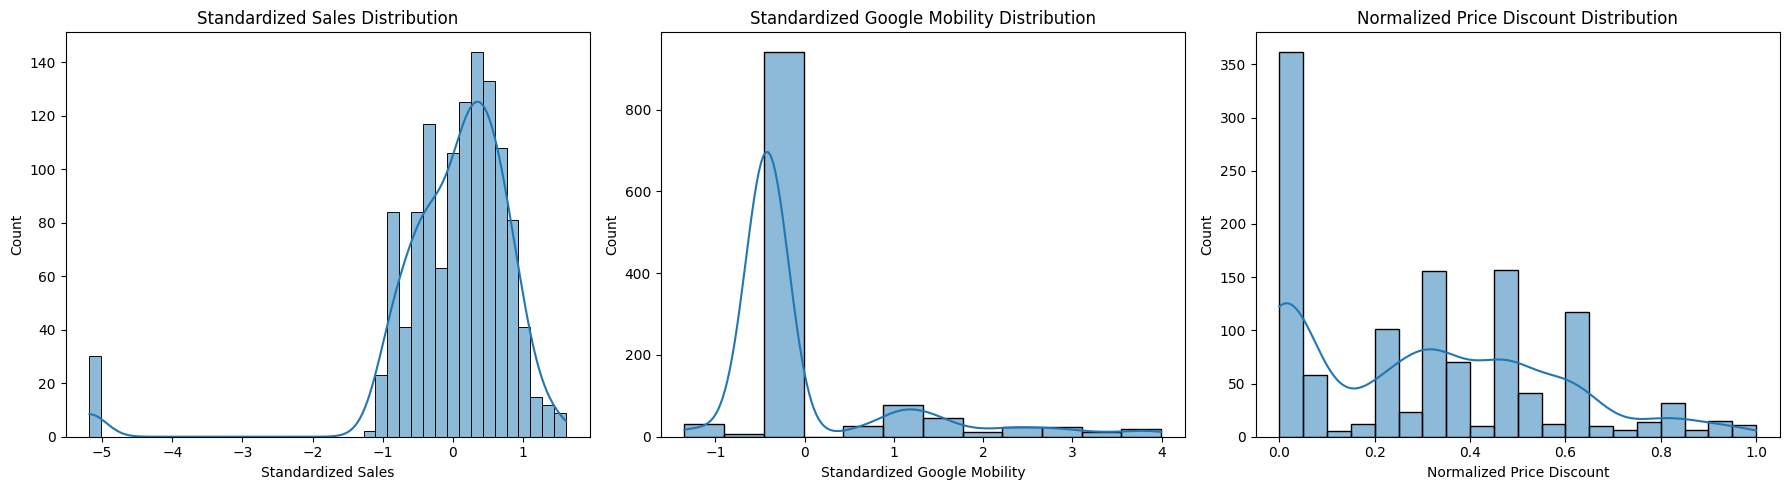

In [534]:
plt.figure(figsize=(18, 5))

# Plot for 'Sales_standardized'
plt.subplot(1, 3, 1)
sns.histplot(data['Sales_standardized'], kde=True)
plt.title('Standardized Sales Distribution')
plt.xlabel('Standardized Sales')

# Plot for 'Google_Mobility_standardized'
plt.subplot(1, 3, 2)
sns.histplot(data['Google_Mobility_standardized'], kde=True)
plt.title('Standardized Google Mobility Distribution')
plt.xlabel('Standardized Google Mobility')

# Plot for 'Price Discount (%)'
plt.subplot(1, 3, 3)
sns.histplot(data['Price Discount (%)'], bins=20, kde=True)
plt.title('Normalized Price Discount Distribution')
plt.xlabel('Normalized Price Discount')

plt.tight_layout()
plt.show()

# EDA (Exploratory Data Analysis)

In [535]:
# Extract year, month, and day as new columns
data['Year'] = data['date'].dt.year
data['Quarter'] = data['date'].dt.quarter
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day

data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_standardized,Google_Mobility_standardized,Year,Quarter,Month,Day
0,SKU1,2017-02-05,27750,0.000000,0,0,0,0.00,0,0,0,0,0.350880,-0.420476,2017,1,2,5
1,SKU1,2017-02-12,29023,0.000000,1,0,1,0.00,0,1,0,0,0.375130,-0.420476,2017,1,2,12
2,SKU1,2017-02-19,45630,0.204819,0,0,0,0.00,0,0,0,0,0.619771,-0.420476,2017,1,2,19
3,SKU1,2017-02-26,26789,0.000000,1,0,1,0.00,0,0,0,0,0.331825,-0.420476,2017,1,2,26
4,SKU1,2017-03-05,41999,0.204819,0,0,0,0.00,0,0,0,0,0.574939,-0.420476,2017,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,0.650602,0,1,0,-7.56,1,0,0,0,1.025391,1.069638,2020,4,10,18
1214,SKU6,2020-10-25,115798,0.626506,0,1,0,-8.39,1,0,0,0,1.123293,1.214296,2020,4,10,25
1215,SKU6,2020-11-01,152186,0.650602,1,0,1,-7.43,1,0,0,0,1.271037,1.046688,2020,4,11,1
1216,SKU6,2020-11-08,26445,0.530120,1,0,1,-5.95,1,0,0,0,0.324837,0.779556,2020,4,11,8


In [536]:
# Add a new column for the week number
data['Week'] = data['date'].dt.isocalendar().week
data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_standardized,Google_Mobility_standardized,Year,Quarter,Month,Day,Week
0,SKU1,2017-02-05,27750,0.000000,0,0,0,0.00,0,0,0,0,0.350880,-0.420476,2017,1,2,5,5
1,SKU1,2017-02-12,29023,0.000000,1,0,1,0.00,0,1,0,0,0.375130,-0.420476,2017,1,2,12,6
2,SKU1,2017-02-19,45630,0.204819,0,0,0,0.00,0,0,0,0,0.619771,-0.420476,2017,1,2,19,7
3,SKU1,2017-02-26,26789,0.000000,1,0,1,0.00,0,0,0,0,0.331825,-0.420476,2017,1,2,26,8
4,SKU1,2017-03-05,41999,0.204819,0,0,0,0.00,0,0,0,0,0.574939,-0.420476,2017,1,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,0.650602,0,1,0,-7.56,1,0,0,0,1.025391,1.069638,2020,4,10,18,42
1214,SKU6,2020-10-25,115798,0.626506,0,1,0,-8.39,1,0,0,0,1.123293,1.214296,2020,4,10,25,43
1215,SKU6,2020-11-01,152186,0.650602,1,0,1,-7.43,1,0,0,0,1.271037,1.046688,2020,4,11,1,44
1216,SKU6,2020-11-08,26445,0.530120,1,0,1,-5.95,1,0,0,0,0.324837,0.779556,2020,4,11,8,45


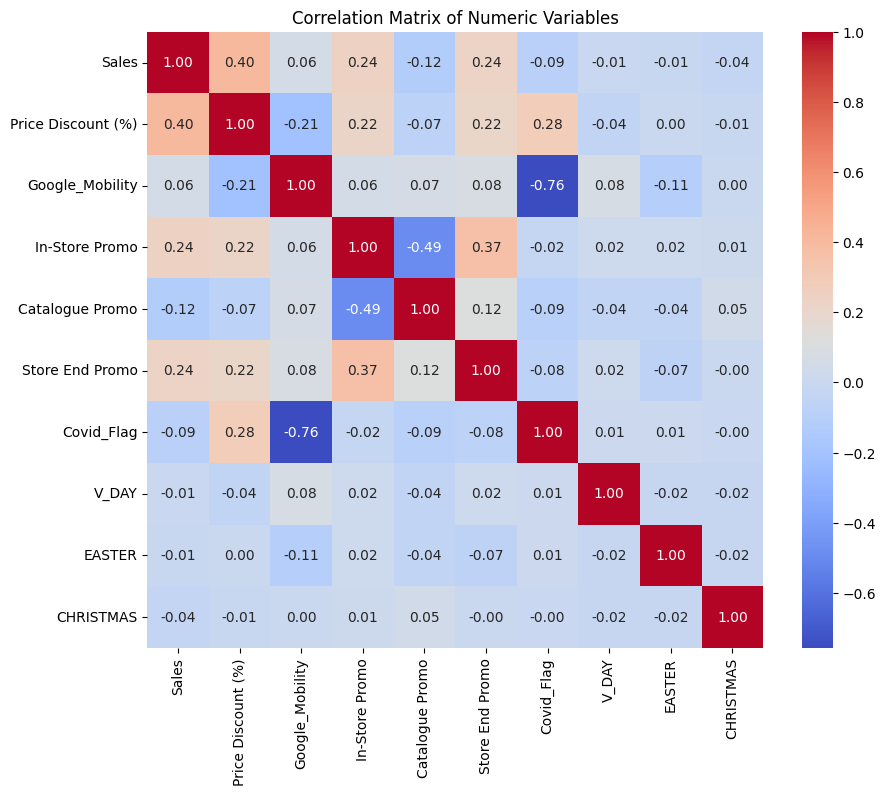

In [537]:
# Create correlation matrix
numeric_cols = ['Sales', 'Price Discount (%)', 'Google_Mobility', 'In-Store Promo', 'Catalogue Promo', 'Store End Promo', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS']
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Variables')

plt.savefig('Correlation Matrix of Numeric Variable.png')
plt.show()

# Google Mobility:相對於基線日（通常是疫情前的一段期間）人們去商店、公園、工作場所等地點的活動頻率有何變化
# 數值越高代表相對於基線期的活動量增加

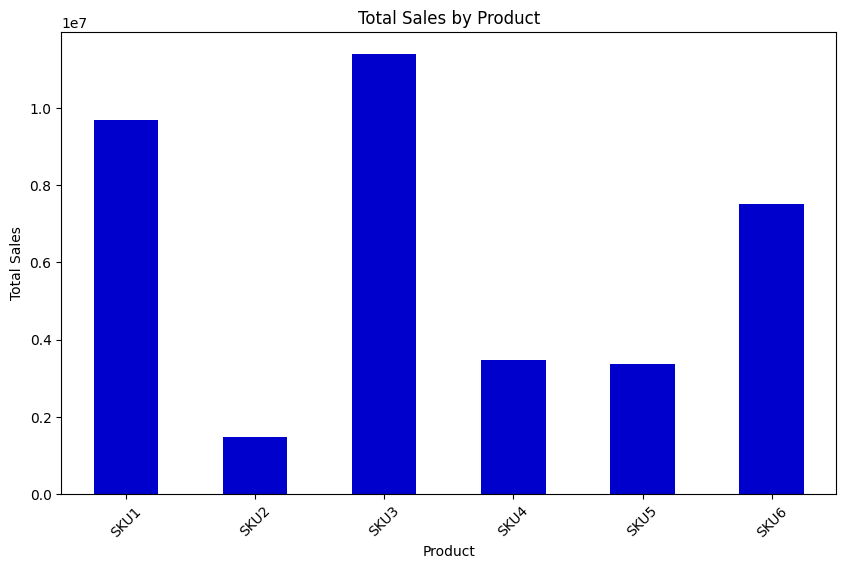

In [538]:
# Total Sales by Product
sales_by_product = data.groupby('Product')['Sales'].sum()
sales_by_product.plot(kind='bar', figsize=(10, 6), color='mediumblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  

plt.savefig('Total Sales by Product.png')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21236\451210000.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))


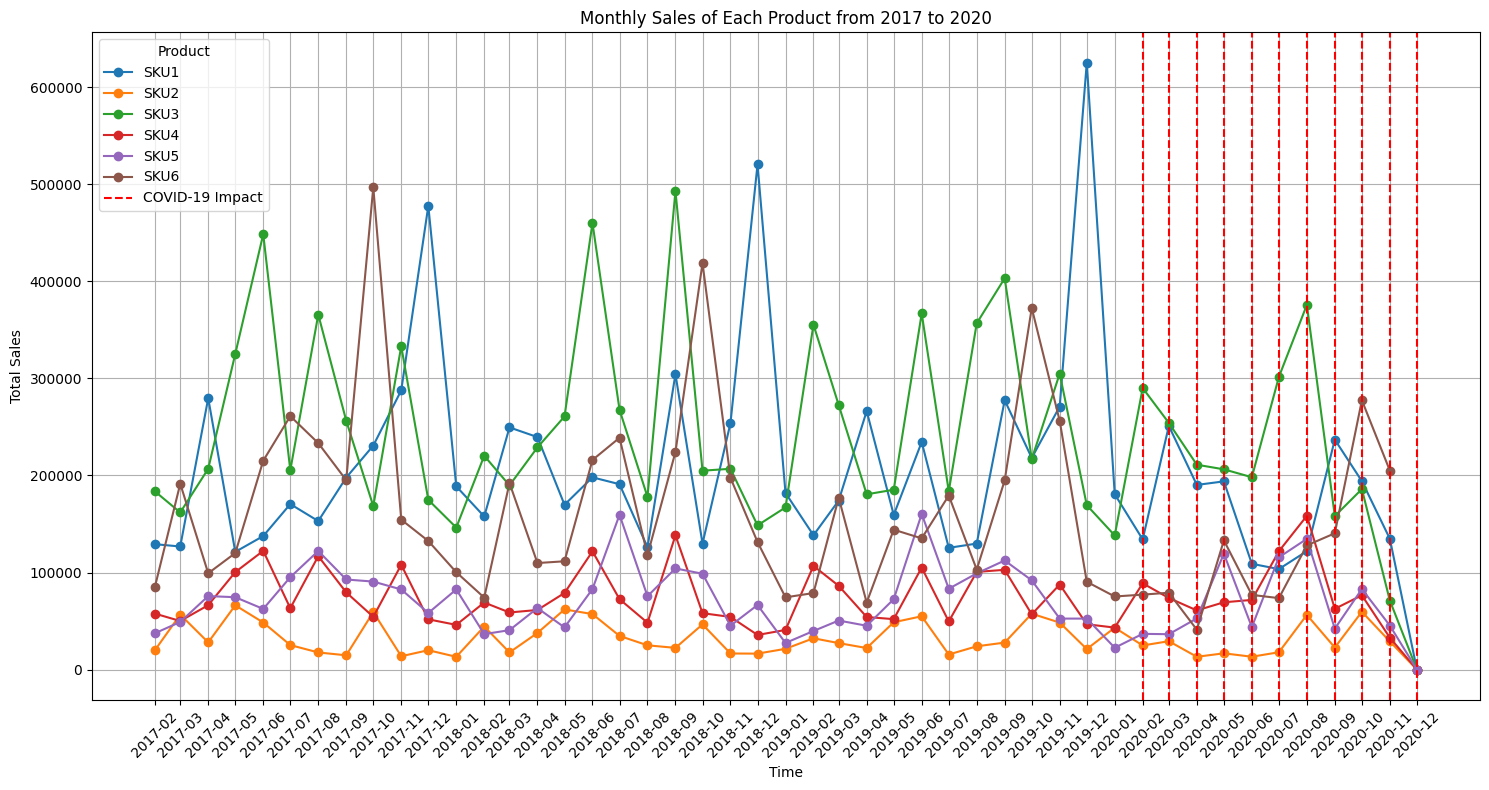

In [539]:
# Group data by Year, Month, and Product, then sum the sales
monthly_sales = data.groupby(['Year', 'Month', 'Product'])['Sales'].sum().unstack()

# Transform ('Year', 'Month') index to a datetime index
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

# Plotting
plt.figure(figsize=(15, 8))
for product in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[product], marker='o', label=product)

# Highlight COVID-19 impact periods
covid_months = data[data['Covid_Flag'] == 1][['Year', 'Month']].drop_duplicates()
covid_dates = pd.to_datetime(covid_months.assign(day=1)) 

for date in covid_dates:
    plt.axvline(x=date, color='red', linestyle='--', alpha=1, label='COVID-19 Impact' if date == covid_dates.iloc[0] else "")

plt.title('Monthly Sales of Each Product from 2017 to 2020')
plt.xlabel('Time')
plt.xticks(monthly_sales.index, monthly_sales.index.strftime('%Y-%m'), rotation=45) 
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.grid(True)
plt.tight_layout() 

plt.savefig('Monthly Sales of Each Product from 2017 to 2020.png')
plt.show()

In [540]:
covid_months

,Year,Month
157,2020,2
160,2020,3
165,2020,4
169,2020,5
174,2020,6
178,2020,7
182,2020,8
187,2020,9
191,2020,10
195,2020,11


In [541]:
covid_dates

157   2020-02-01
160   2020-03-01
165   2020-04-01
169   2020-05-01
174   2020-06-01
178   2020-07-01
182   2020-08-01
187   2020-09-01
191   2020-10-01
195   2020-11-01
200   2020-12-01
dtype: datetime64[ns]

In [542]:
monthly_sales = data.groupby(['Year', 'Month', 'Product'])['Sales'].sum().unstack()
monthly_sales

Product         SKU1     SKU2      SKU3      SKU4      SKU5      SKU6
Year Month                                                           
2017 2      129192.0  20075.0  183538.0   57631.0   37441.0   85572.0
     3      126817.0  56607.0  161888.0   50028.0   49050.0  191521.0
     4      279668.0  28002.0  206919.0   66335.0   75719.0   99209.0
     5      121253.0  66218.0  325310.0  100427.0   74556.0  120044.0
     6      137581.0  48483.0  448665.0  122328.0   62472.0  215219.0
     7      170538.0  25227.0  205317.0   63220.0   95206.0  261154.0
     8      153034.0  17623.0  365835.0  116872.0  122217.0  233360.0
     9      197826.0  14692.0  256491.0   79510.0   92806.0  195182.0
     10     230822.0  59238.0  168433.0   54335.0   90664.0  497040.0
     11     287727.0  13721.0  333180.0  107982.0   82542.0  154470.0
     12     477842.0  19948.0  174850.0   51768.0   58307.0  132498.0
2018 1      188801.0  13134.0  146318.0   46060.0   82565.0  100309.0
     2      157744.0  44365.0  220328.0   69077.0   36526.0   74139.0
     3      249538.0  17656.0  189772.0   58823.0   40605.0  192231.0
     4      239562.0  37719.0  228927.0   61400.0   63352.0  109764.0
     5      169834.0  61964.0  260823.0   78905.0   43454.0  111579.0
     6      198075.0  57186.0  460273.0  121835.0   82961.0  215977.0
     7      191017.0  34666.0  267724.0   72545.0  159482.0  238852.0
     8      125971.0  24984.0  177955.0   48261.0   75598.0  118008.0
     9      304495.0  22344.0  493257.0  138337.0  104213.0  224216.0
     10     129828.0  46545.0  204918.0   58095.0   98739.0  418805.0
     11     254047.0  16556.0  206909.0   54234.0   45206.0  197589.0
     12     520590.0  16415.0  148589.0   35647.0   66517.0  131435.0
2019 1      181997.0  21378.0  167096.0   40820.0   27387.0   74406.0
     2      138445.0  32238.0  355429.0  106837.0   39740.0   78849.0
     3      174196.0  27259.0  272516.0   86266.0   50515.0  176980.0
     4      266368.0  22171.0  180605.0   54165.0   45148.0   69051.0
     5      159307.0  48738.0  185330.0   51940.0   72544.0  144149.0
     6      234517.0  54918.0  367015.0  105144.0  160397.0  135182.0
     7      125444.0  15503.0  183682.0   49551.0   83274.0  179332.0
     8      129828.0  23967.0  356842.0  100619.0   99095.0  103042.0
     9      277549.0  27786.0  403242.0  102781.0  112396.0  194940.0
     10     218074.0  57547.0  216927.0   56929.0   91940.0  372639.0
     11     271049.0  48388.0  304949.0   87644.0   52513.0  256288.0
     12     625411.0  21136.0  169402.0   46683.0   52515.0   90460.0
2020 1      180687.0  43159.0  138186.0   43226.0   22477.0   75291.0
     2      134106.0  24825.0  290126.0   88873.0   36797.0   77218.0
     3      251074.0  29226.0  254178.0   73749.0   36434.0   79160.0
     4      190277.0  13159.0  211096.0   60947.0   52713.0   41113.0
     5      193926.0  16738.0  206343.0   69324.0  119419.0  133122.0
     6      108976.0  13224.0  198209.0   71753.0   43713.0   76935.0
     7      103538.0  17837.0  301574.0  121927.0  115642.0   73616.0
     8      122031.0  56349.0  375843.0  158418.0  134715.0  127964.0
     9      236935.0  22678.0  158158.0   62575.0   42157.0  140430.0
     10     194136.0  59574.0  185984.0   76550.0   83004.0  277533.0
     11     134795.0  28986.0   71130.0   32835.0   45356.0  205045.0
     12          0.0      0.0       0.0       0.0       0.0       NaN

In [543]:
monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

C:\Users\User\AppData\Local\Temp\ipykernel_21236\3067440116.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_sales.index = pd.to_datetime(monthly_sales.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))


In [544]:
monthly_sales

Product,SKU1,SKU2,SKU3,SKU4,SKU5,SKU6
2017-02-01,129192.0,20075.0,183538.0,57631.0,37441.0,85572.0
2017-03-01,126817.0,56607.0,161888.0,50028.0,49050.0,191521.0
2017-04-01,279668.0,28002.0,206919.0,66335.0,75719.0,99209.0
2017-05-01,121253.0,66218.0,325310.0,100427.0,74556.0,120044.0
2017-06-01,137581.0,48483.0,448665.0,122328.0,62472.0,215219.0
2017-07-01,170538.0,25227.0,205317.0,63220.0,95206.0,261154.0
2017-08-01,153034.0,17623.0,365835.0,116872.0,122217.0,233360.0
2017-09-01,197826.0,14692.0,256491.0,79510.0,92806.0,195182.0
2017-10-01,230822.0,59238.0,168433.0,54335.0,90664.0,497040.0
2017-11-01,287727.0,13721.0,333180.0,107982.0,82542.0,154470.0


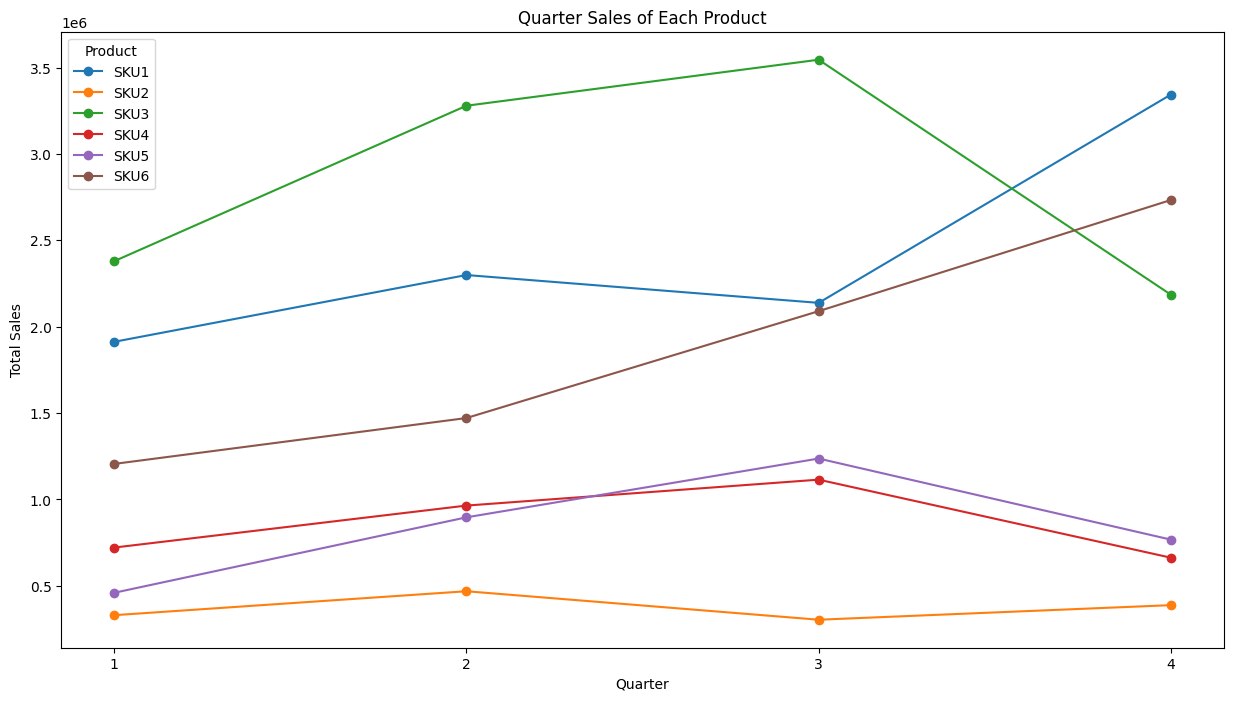

In [545]:
# Group data by Month and Product, and sum the sales
quarter_sales = data.groupby(['Quarter', 'Product'])['Sales'].sum().unstack()

# Plotting
plt.figure(figsize=(15, 8))
for product in quarter_sales.columns:
    plt.plot(quarter_sales.index, quarter_sales[product], marker='o', label=product)

plt.title('Quarter Sales of Each Product')
plt.xlabel('Quarter')
plt.xticks(quarter_sales.index) 
plt.ylabel('Total Sales')
plt.legend(title='Product')
#plt.grid(True)

plt.savefig('Quarter Sales of Each Product.png')
plt.show()

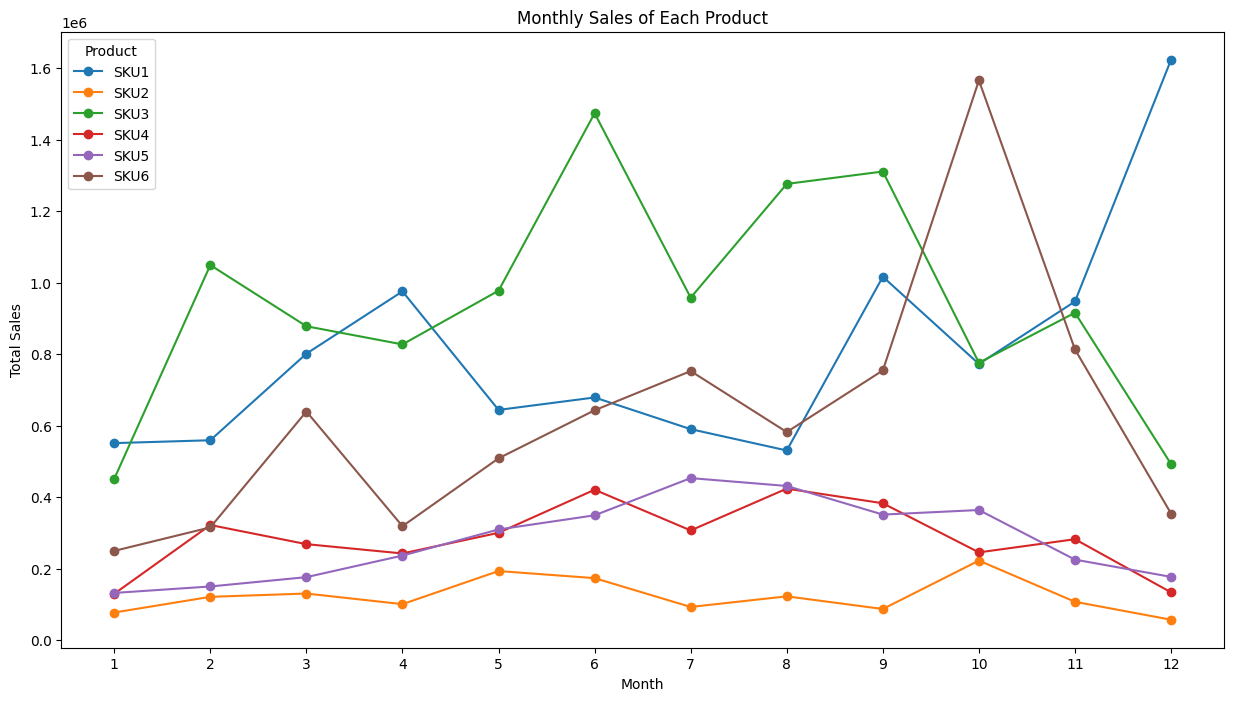

In [546]:
# Group data by Month and Product, and sum the sales
monthly_sales = data.groupby(['Month', 'Product'])['Sales'].sum().unstack()

# Plotting
plt.figure(figsize=(15, 8))
for product in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[product], marker='o', label=product)

plt.title('Monthly Sales of Each Product')
plt.xlabel('Month')
plt.xticks(monthly_sales.index) 
plt.ylabel('Total Sales')
plt.legend(title='Product')

plt.savefig('Monthly Sales of Each Product.png')
plt.show()

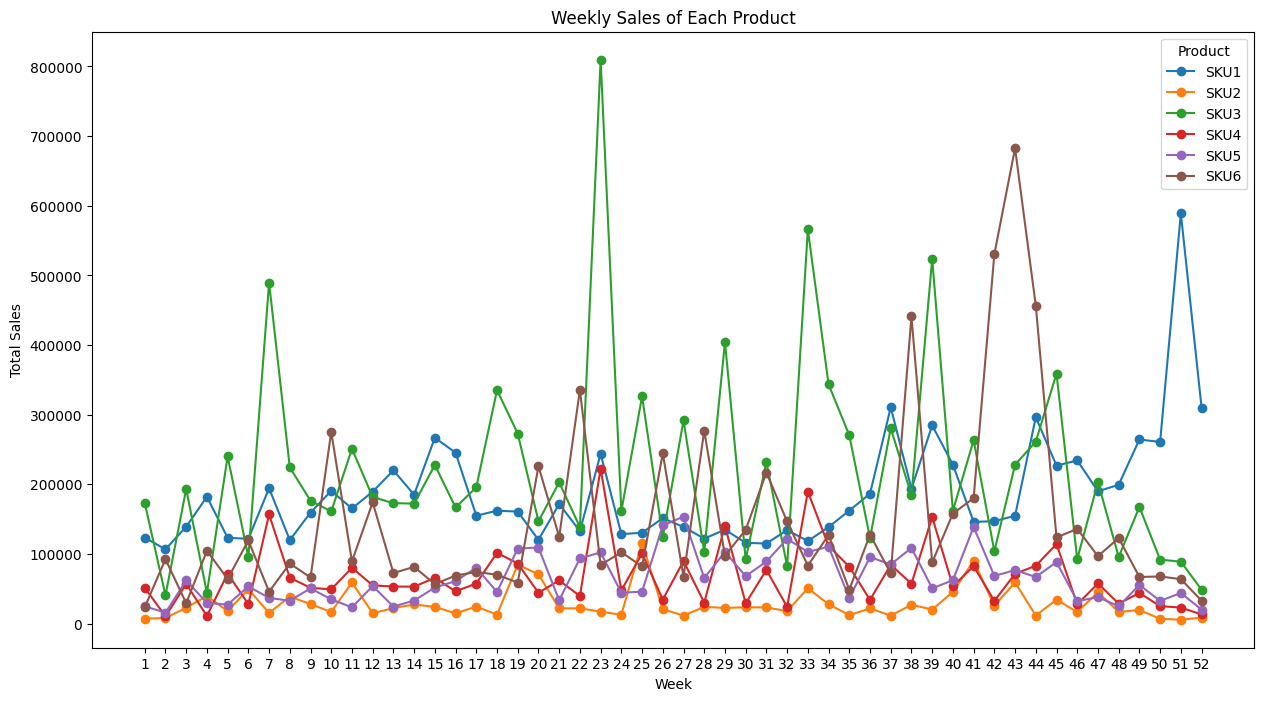

In [547]:
# Group data by Week and Product, and sum the sales
weekly_sales = data.groupby(['Week', 'Product'])['Sales'].sum().unstack()

# Plotting
plt.figure(figsize=(15, 8))
for product in weekly_sales.columns:
    plt.plot(weekly_sales.index, weekly_sales[product], marker='o', label=product)

plt.title('Weekly Sales of Each Product')
plt.xlabel('Week')
plt.xticks(weekly_sales.index) 
plt.ylabel('Total Sales')
plt.legend(title='Product')

plt.savefig('Weekly Sales of Each Product.png')
plt.show()

In [548]:
weekly_sales

Product,SKU1,SKU2,SKU3,SKU4,SKU5,SKU6
Week,,,,,,
1,123502,7304,173363,51511,25008,23509
2,106751,7983,40583,10508,15624,92568
3,139141,22758,193232,57001,61934,29354
4,182091,39626,44422,11086,29863,104575
5,123347,17934,240039,71706,27315,64169
6,121733,49459,95482,28018,53398,119440
7,194419,15278,489597,156766,36921,45815
8,119988,38832,224303,65928,32870,86354
9,159490,28038,176466,51445,50617,66326


In [549]:
data

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Sales_standardized,Google_Mobility_standardized,Year,Quarter,Month,Day,Week
0,SKU1,2017-02-05,27750,0.000000,0,0,0,0.00,0,0,0,0,0.350880,-0.420476,2017,1,2,5,5
1,SKU1,2017-02-12,29023,0.000000,1,0,1,0.00,0,1,0,0,0.375130,-0.420476,2017,1,2,12,6
2,SKU1,2017-02-19,45630,0.204819,0,0,0,0.00,0,0,0,0,0.619771,-0.420476,2017,1,2,19,7
3,SKU1,2017-02-26,26789,0.000000,1,0,1,0.00,0,0,0,0,0.331825,-0.420476,2017,1,2,26,8
4,SKU1,2017-03-05,41999,0.204819,0,0,0,0.00,0,0,0,0,0.574939,-0.420476,2017,1,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,0.650602,0,1,0,-7.56,1,0,0,0,1.025391,1.069638,2020,4,10,18,42
1214,SKU6,2020-10-25,115798,0.626506,0,1,0,-8.39,1,0,0,0,1.123293,1.214296,2020,4,10,25,43
1215,SKU6,2020-11-01,152186,0.650602,1,0,1,-7.43,1,0,0,0,1.271037,1.046688,2020,4,11,1,44
1216,SKU6,2020-11-08,26445,0.530120,1,0,1,-5.95,1,0,0,0,0.324837,0.779556,2020,4,11,8,45


In [550]:
average_sales = data.groupby(['Product', 'V_DAY'])['Sales'].mean()
average_sales

Product  V_DAY
SKU1     0        47782.010000
         1        34516.500000
SKU2     0         7224.145000
         1        11330.750000
SKU3     0        55611.685000
         1        66936.000000
SKU4     0        16906.600000
         1        20472.750000
SKU5     0        16571.890000
         1        11427.750000
SKU6     0        38157.860825
         1        24573.250000
Name: Sales, dtype: float64

In [551]:
average_sales_vday = data.groupby(['Product', 'V_DAY'])['Sales'].mean().unstack()
average_sales_vday

V_DAY,0,1
Product,,
SKU1,47782.010000,34516.50
SKU2,7224.145000,11330.75
SKU3,55611.685000,66936.00
SKU4,16906.600000,20472.75
SKU5,16571.890000,11427.75
SKU6,38157.860825,24573.25


In [552]:
# Calculate percentage increase from Non-Valentine's Day (0) to Valentine's Day (1)
percentage_increase = (average_sales_vday[1] - average_sales_vday[0]) / average_sales_vday[0] * 100
percentage_increase

Product
SKU1   -27.762562
SKU2    56.845551
SKU3    20.363193
SKU4    21.093242
SKU5   -31.041360
SKU6   -35.601081
dtype: float64

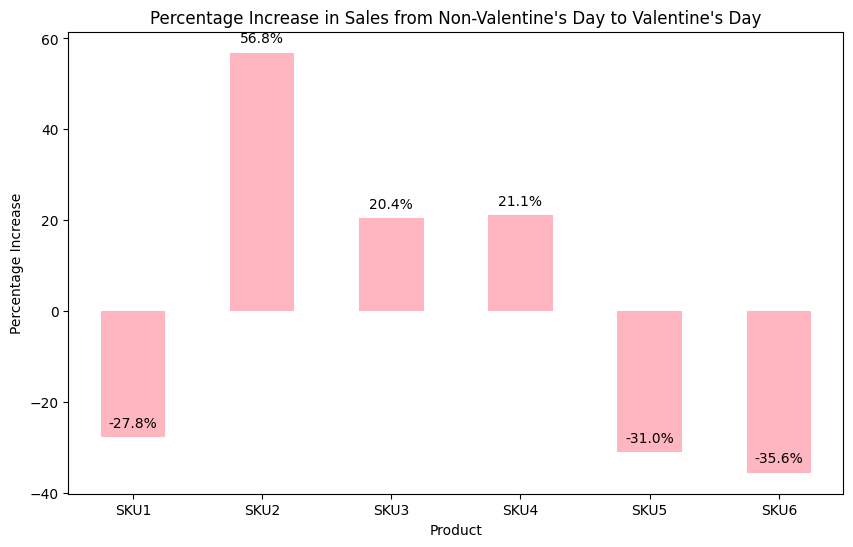

In [553]:
ax = percentage_increase.plot(kind='bar', color='lightpink', figsize=(10, 6))
plt.title('Percentage Increase in Sales from Non-Valentine\'s Day to Valentine\'s Day')
plt.xlabel('Product')
plt.ylabel('Percentage Increase')
plt.xticks(rotation=0) 

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig('Percentage Increase in Sales from Non-Valentine\'s Day to Valentine\'s Day.png')
plt.show()

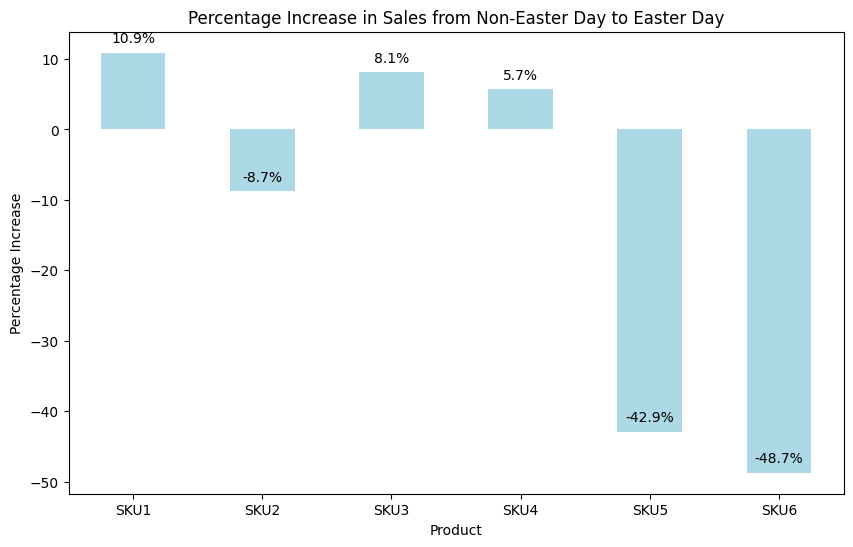

In [554]:
average_sales_easter = data.groupby(['Product', 'EASTER'])['Sales'].mean().unstack()

percentage_increase_easter = (average_sales_easter[1] - average_sales_easter[0]) / average_sales_easter[0] * 100

ax = percentage_increase_easter.plot(kind='bar', color='lightblue', figsize=(10, 6))
plt.title('Percentage Increase in Sales from Non-Easter Day to Easter Day')
plt.xlabel('Product')
plt.ylabel('Percentage Increase')
plt.xticks(rotation=0)  

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Saving the plot for Easter
plt.savefig('Percentage Increase in Sales from Non-Easter Day to Easter Day.png')
plt.show()

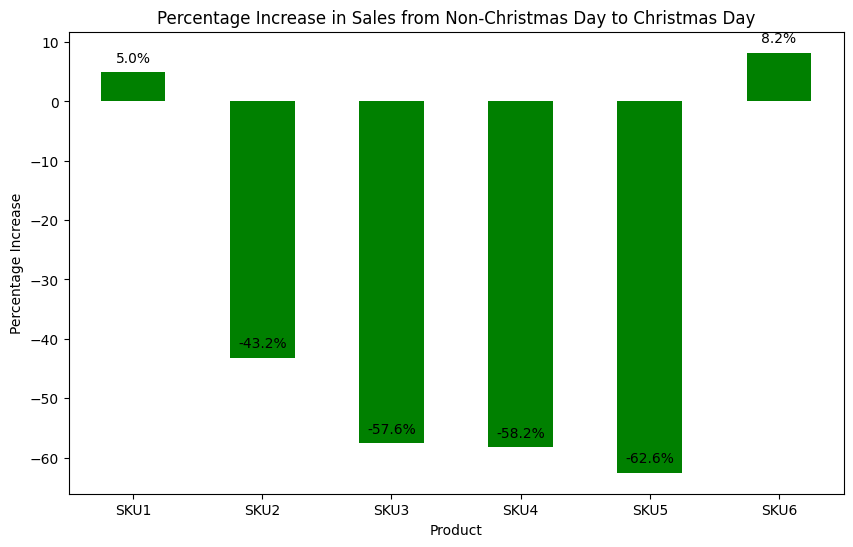

In [555]:
average_sales_christmas = data.groupby(['Product', 'CHRISTMAS'])['Sales'].mean().unstack()

percentage_increase_christmas = (average_sales_christmas[1] - average_sales_christmas[0]) / average_sales_christmas[0] * 100

ax = percentage_increase_christmas.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Percentage Increase in Sales from Non-Christmas Day to Christmas Day')
plt.xlabel('Product')
plt.ylabel('Percentage Increase')
plt.xticks(rotation=0) 

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.savefig('Percentage Increase in Sales from Non-Christmas Day to Christmas Day.png')
plt.show()

In [576]:
christmas_dates = christmas[christmas['CHRISTMAS'] == 1]
print(christmas_dates[['date', 'Product', 'Sales', 'CHRISTMAS']])    

           date Product  Sales  CHRISTMAS
43   2017-12-03    SKU1  66333          1
95   2018-12-02    SKU1  59037          1
147  2019-12-01    SKU1  73956          1
202  2020-12-20    SKU1      0          1
247  2017-12-03    SKU2   6270          1
299  2018-12-02    SKU2   2781          1
351  2019-12-01    SKU2   7690          1
406  2020-12-20    SKU2      0          1
451  2017-12-03    SKU3  62176          1
503  2018-12-02    SKU3  16673          1
555  2019-12-01    SKU3  16864          1
610  2020-12-20    SKU3      0          1
655  2017-12-03    SKU4  20914          1
707  2018-12-02    SKU4   3719          1
759  2019-12-01    SKU4   4056          1
814  2020-12-20    SKU4      0          1
859  2017-12-03    SKU5  12363          1
911  2018-12-02    SKU5   6095          1
963  2019-12-01    SKU5   6516          1
1018 2020-12-20    SKU5      0          1
1063 2017-12-03    SKU6  42982          1
1115 2018-12-02    SKU6  39116          1
1167 2019-12-01    SKU6  40726    

In [556]:
vday_dates = data[data['V_DAY'] == 1]
print(vday_dates[['date', 'Product', 'Sales', 'V_DAY', 'Week']])    

           date Product   Sales  V_DAY  Week
1    2017-02-12    SKU1   29023      1     6
53   2018-02-11    SKU1   33604      1     6
105  2019-02-10    SKU1   29867      1     6
158  2020-02-16    SKU1   45572      1     7
205  2017-02-12    SKU2    7080      1     6
257  2018-02-11    SKU2   32549      1     6
309  2019-02-10    SKU2    2837      1     6
362  2020-02-16    SKU2    2857      1     7
409  2017-02-12    SKU3   49090      1     6
461  2018-02-11    SKU3   14822      1     6
513  2019-02-10    SKU3   16284      1     6
566  2020-02-16    SKU3  187548      1     7
613  2017-02-12    SKU4   15705      1     6
665  2018-02-11    SKU4    4306      1     6
717  2019-02-10    SKU4    3789      1     6
770  2020-02-16    SKU4   58091      1     7
817  2017-02-12    SKU5    5748      1     6
869  2018-02-11    SKU5   20916      1     6
921  2019-02-10    SKU5   13048      1     6
974  2020-02-16    SKU5    5999      1     7
1021 2017-02-12    SKU6   11659      1     6
1073 2018-

In [557]:
# Filter rows where Valentine's Day was observed
valentines_day_data = data[data['V_DAY'] == 1]

# Extract just the dates for these entries
valentines_dates = valentines_day_data['date'].drop_duplicates()
valentines_dates

1     2017-02-12
53    2018-02-11
105   2019-02-10
158   2020-02-16
Name: date, dtype: datetime64[ns]

In [558]:
data['date'] = pd.to_datetime(data['date'])

# Function to adjust year based on Valentine's Day
def adjust_year_based_on_vday(row, vday_dates):
    past_vdays = vday_dates[vday_dates <= row['date']]
    if not past_vdays.empty:
        
        most_recent_vday = past_vdays.max()
        
        # If the current date is after the most recent V-Day, consider it part of the next year
        if row['date'] > most_recent_vday:
            return row['Year'] + 1
    return row['Year']

# Apply the function to each row in the DataFrame
data['Adjusted_Year'] = data.apply(adjust_year_based_on_vday, axis=1, vday_dates=valentines_dates)


# Group and compute mean sales
year_average_sales = data.groupby(['Product', 'Adjusted_Year', 'V_DAY'])['Sales'].mean().unstack()

# Fill NaN values
year_average_sales = year_average_sales.fillna(0)
year_average_sales

V_DAY                             0         1
Product Adjusted_Year                        
SKU1    2017           27750.000000   29023.0
        2018           49033.195652   33604.0
        2019           52860.745098   29867.0
        2020           54359.176471   45572.0
        2021           35390.372549       0.0
SKU2    2017            7180.000000    7080.0
        2018            7729.869565   32549.0
        2019            7078.137255    2837.0
        2020            7807.686275    2857.0
        2021            6331.333333       0.0
SKU3    2017           39767.000000   49090.0
        2018           59599.326087   14822.0
        2019           58646.490196   16284.0
        2020           61701.000000  187548.0
        2021           43201.549020       0.0
SKU4    2017           12835.000000   15705.0
        2018           18302.086957    4306.0
        2019           16449.274510    3789.0
        2020           17364.509804   58091.0
        2021           15727.176471       0.0
SKU5    2017            5229.000000    5748.0
        2018           18043.543478   20916.0
        2019           17221.607843   13048.0
        2020           17145.411765    5999.0
        2021           14243.686275       0.0
SKU6    2017           32138.000000   11659.0
        2018           46553.739130   38384.0
        2019           41069.019608   37295.0
        2020           36039.666667   10955.0
        2021           28810.488889       0.0

In [559]:
# Calculate percentage increase from Non-Valentine's Day (0) to Valentine's Day (1)
percentage_rate = (year_average_sales[1] - year_average_sales[0]) / year_average_sales[0] * 100

percentage_rate = percentage_rate.reset_index()  # Reset index to access 'Adjusted_Year' easily
percentage_rate = percentage_rate[percentage_rate['Adjusted_Year'] != 2021]

percentage_rate.set_index(['Product', 'Adjusted_Year'], inplace=True)
percentage_rate = percentage_rate.squeeze() #Series

percentage_rate

Product  Adjusted_Year
SKU1     2017               4.587387
         2018             -31.466837
         2019             -43.498715
         2020             -16.165029
SKU2     2017              -1.392758
         2018             321.080844
         2019             -59.918833
         2020             -63.407853
SKU3     2017              23.444062
         2018             -75.130591
         2019             -72.233632
         2020             203.962659
SKU4     2017              22.360732
         2018             -76.472628
         2019             -76.965549
         2020             234.538669
SKU5     2017               9.925416
         2018              15.919581
         2019             -24.234717
         2020             -65.011047
SKU6     2017             -63.722074
         2018             -17.549050
         2019              -9.189456
         2020             -69.602938
Name: 0, dtype: float64

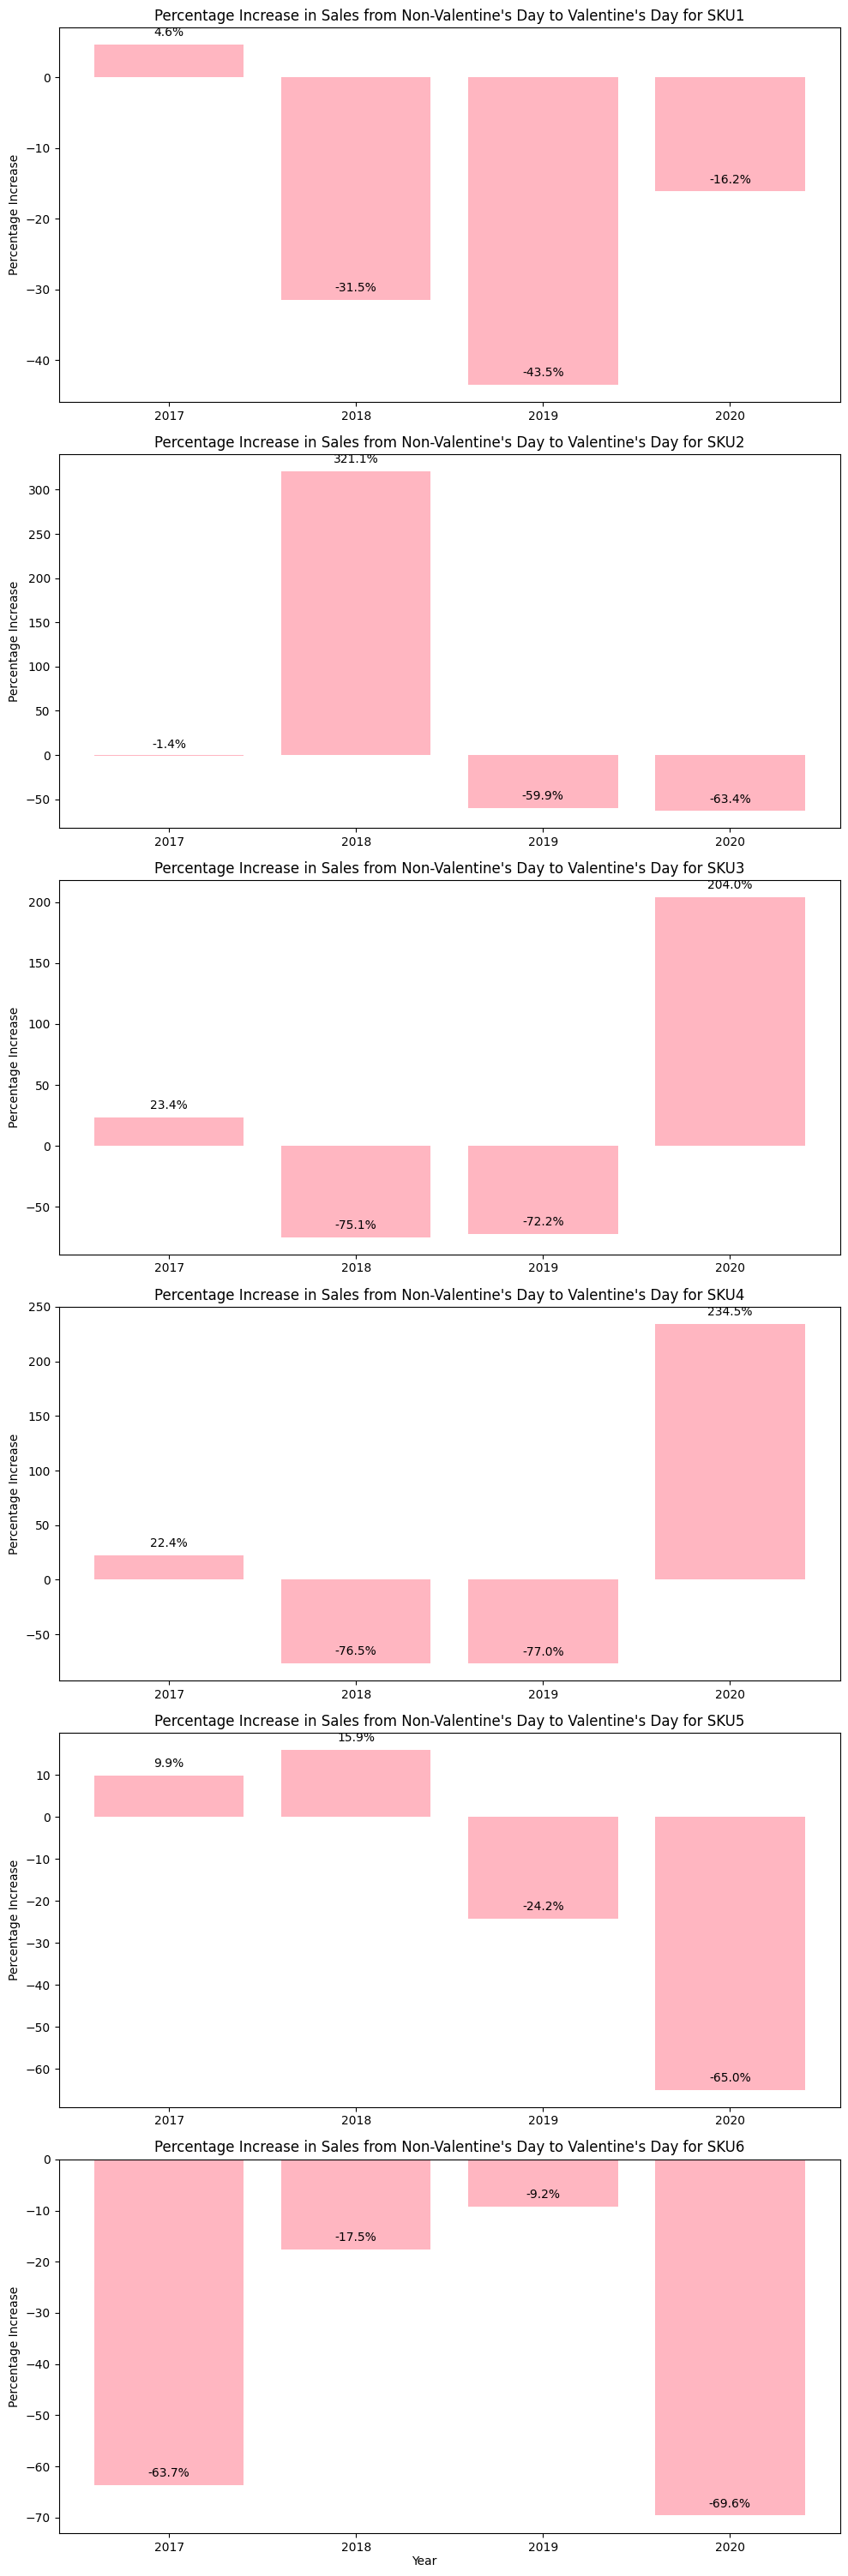

In [560]:
# Split the DataFrame by product
products = percentage_rate.index.get_level_values(0).unique()

# Create subplots - 6 rows, 1 column
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30), sharex=False)

for i, product in enumerate(products):
    ax = axes[i]
    data_to_plot = percentage_rate.loc[product]
    ax.bar(data_to_plot.index, data_to_plot.values, color='lightpink')
    
    ax.set_title(f'Percentage Increase in Sales from Non-Valentine\'s Day to Valentine\'s Day for {product}')
    ax.set_ylabel('Percentage Increase')

    ax.set_xticks(data_to_plot.index)  
    ax.set_xticklabels(data_to_plot.index)  

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set a common xlabel for the entire figure
fig.text(0.5, 0.002, 'Year', ha='center', va='center')


plt.tight_layout()
plt.savefig('Percentage Increase in Sales from Non-Valentine\'s Day to Valentine\'s Day Each Year.png')
plt.show()

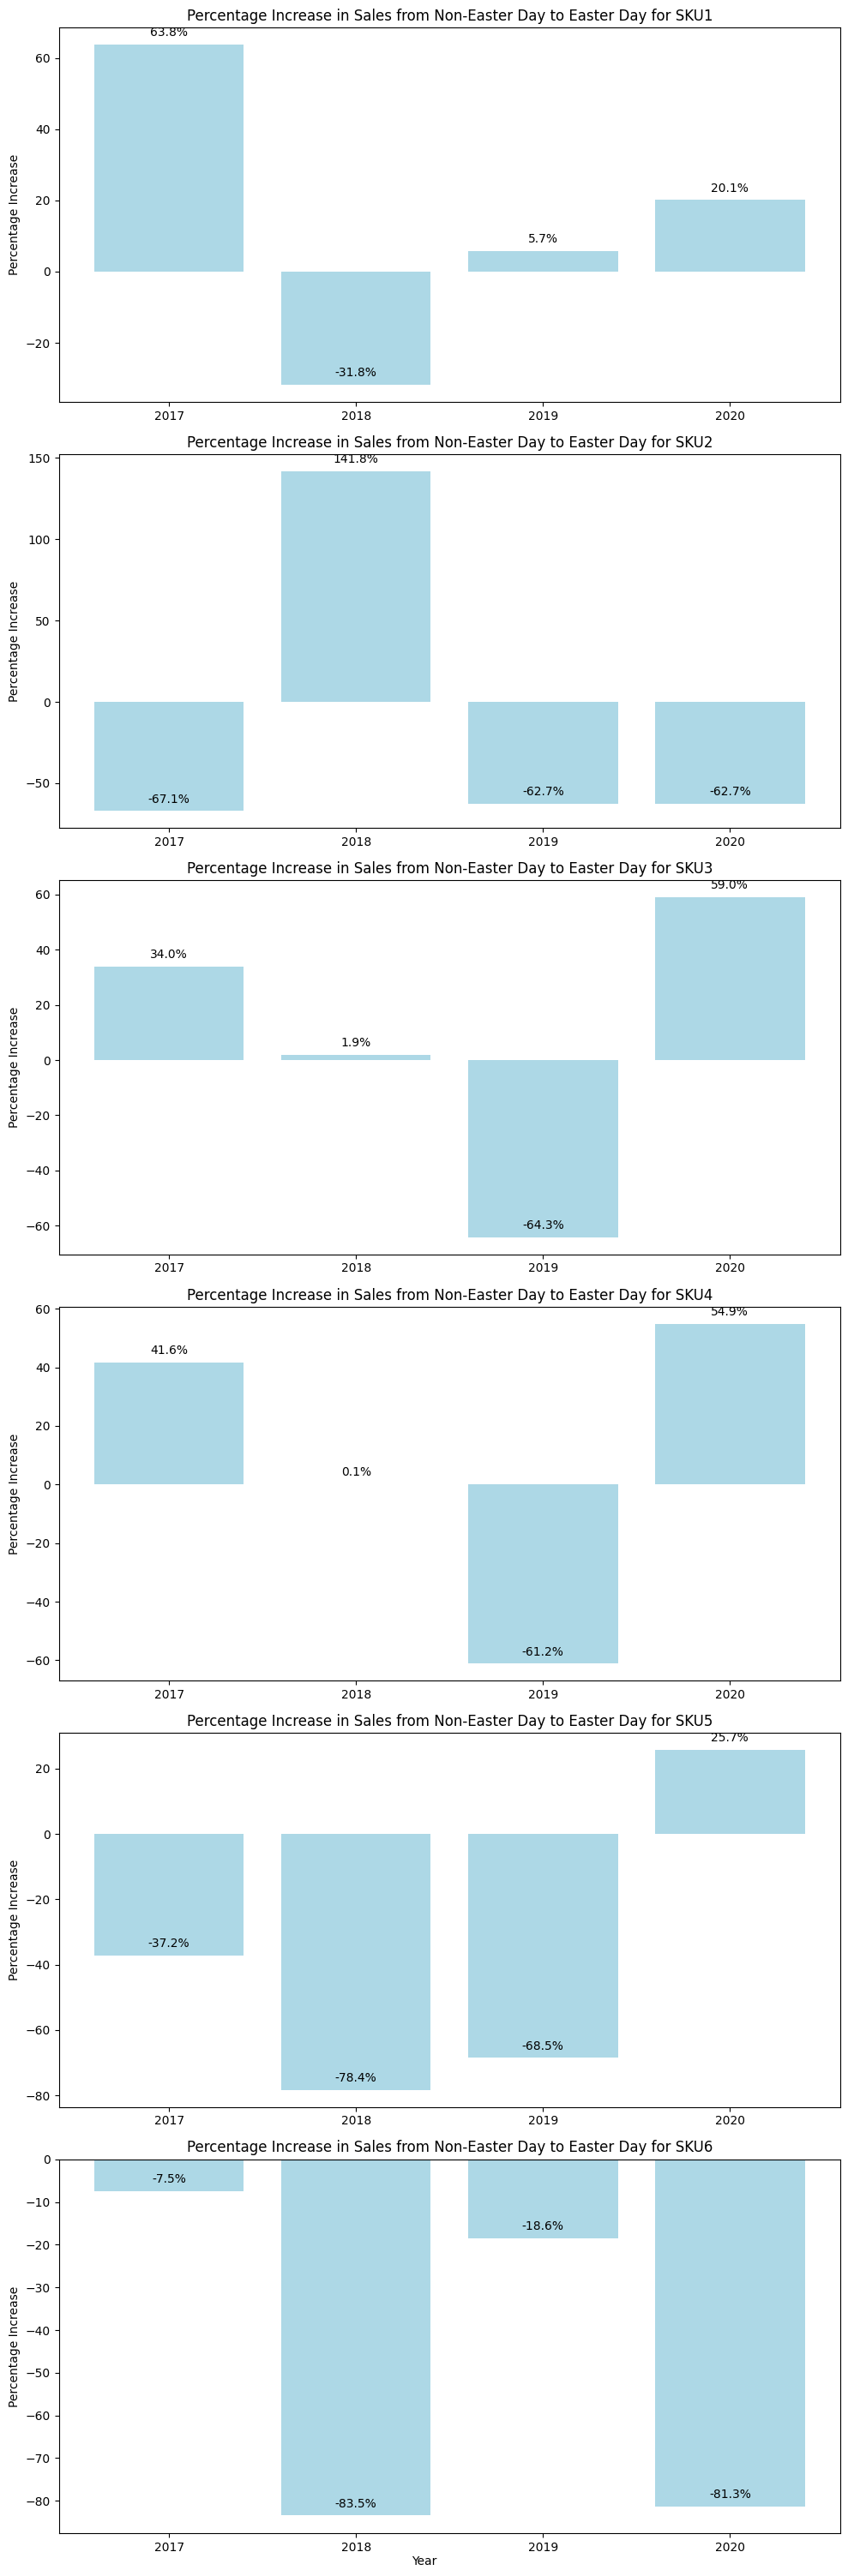

In [561]:
easter_day_data = data[data['EASTER'] == 1]
easter_dates = easter_day_data['date'].drop_duplicates()

# Function to adjust year based on Easter
def adjust_year_based_on_easter(row, easter_dates):
    past_easters = easter_dates[easter_dates <= row['date']]
    if not past_easters.empty:
        most_recent_easter = past_easters.max()
        # If the current date is after the most recent Easter, consider it part of the next year
        if row['date'] > most_recent_easter:
            return row['Year'] + 1
    return row['Year']

# Apply the function to each row in the DataFrame
data['Adjusted_Year'] = data.apply(adjust_year_based_on_easter, axis=1, easter_dates=easter_dates)

# Group and compute mean sales
year_average_sales = data.groupby(['Product', 'Adjusted_Year', 'EASTER'])['Sales'].mean().unstack()
year_average_sales = year_average_sales.fillna(0)

# Calculate percentage increase from Non-Easter Day (0) to Easter Day (1)
percentage_rate = (year_average_sales[1] - year_average_sales[0]) / year_average_sales[0] * 100

percentage_rate = percentage_rate.reset_index()
percentage_rate = percentage_rate[percentage_rate['Adjusted_Year'] != 2021]
percentage_rate.set_index(['Product', 'Adjusted_Year'], inplace=True)
percentage_rate = percentage_rate.squeeze()



# Split the DataFrame by product
products = percentage_rate.index.get_level_values(0).unique()
# Create subplots - 6 rows, 1 column
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30), sharex=False)

for i, product in enumerate(products):
    ax = axes[i]
    data_to_plot = percentage_rate.loc[product]
    ax.bar(data_to_plot.index, data_to_plot.values, color='lightblue')  # Change color to green for Easter theme
    
    ax.set_title(f'Percentage Increase in Sales from Non-Easter Day to Easter Day for {product}')
    ax.set_ylabel('Percentage Increase')

    ax.set_xticks(data_to_plot.index)  
    ax.set_xticklabels(data_to_plot.index)  

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set a common xlabel for the entire figure
fig.text(0.5, 0.002, 'Year', ha='center', va='center')

plt.tight_layout()
plt.savefig('Percentage Increase in Sales from Non-Easter Day to Easter Day Each Year.png')
plt.show()

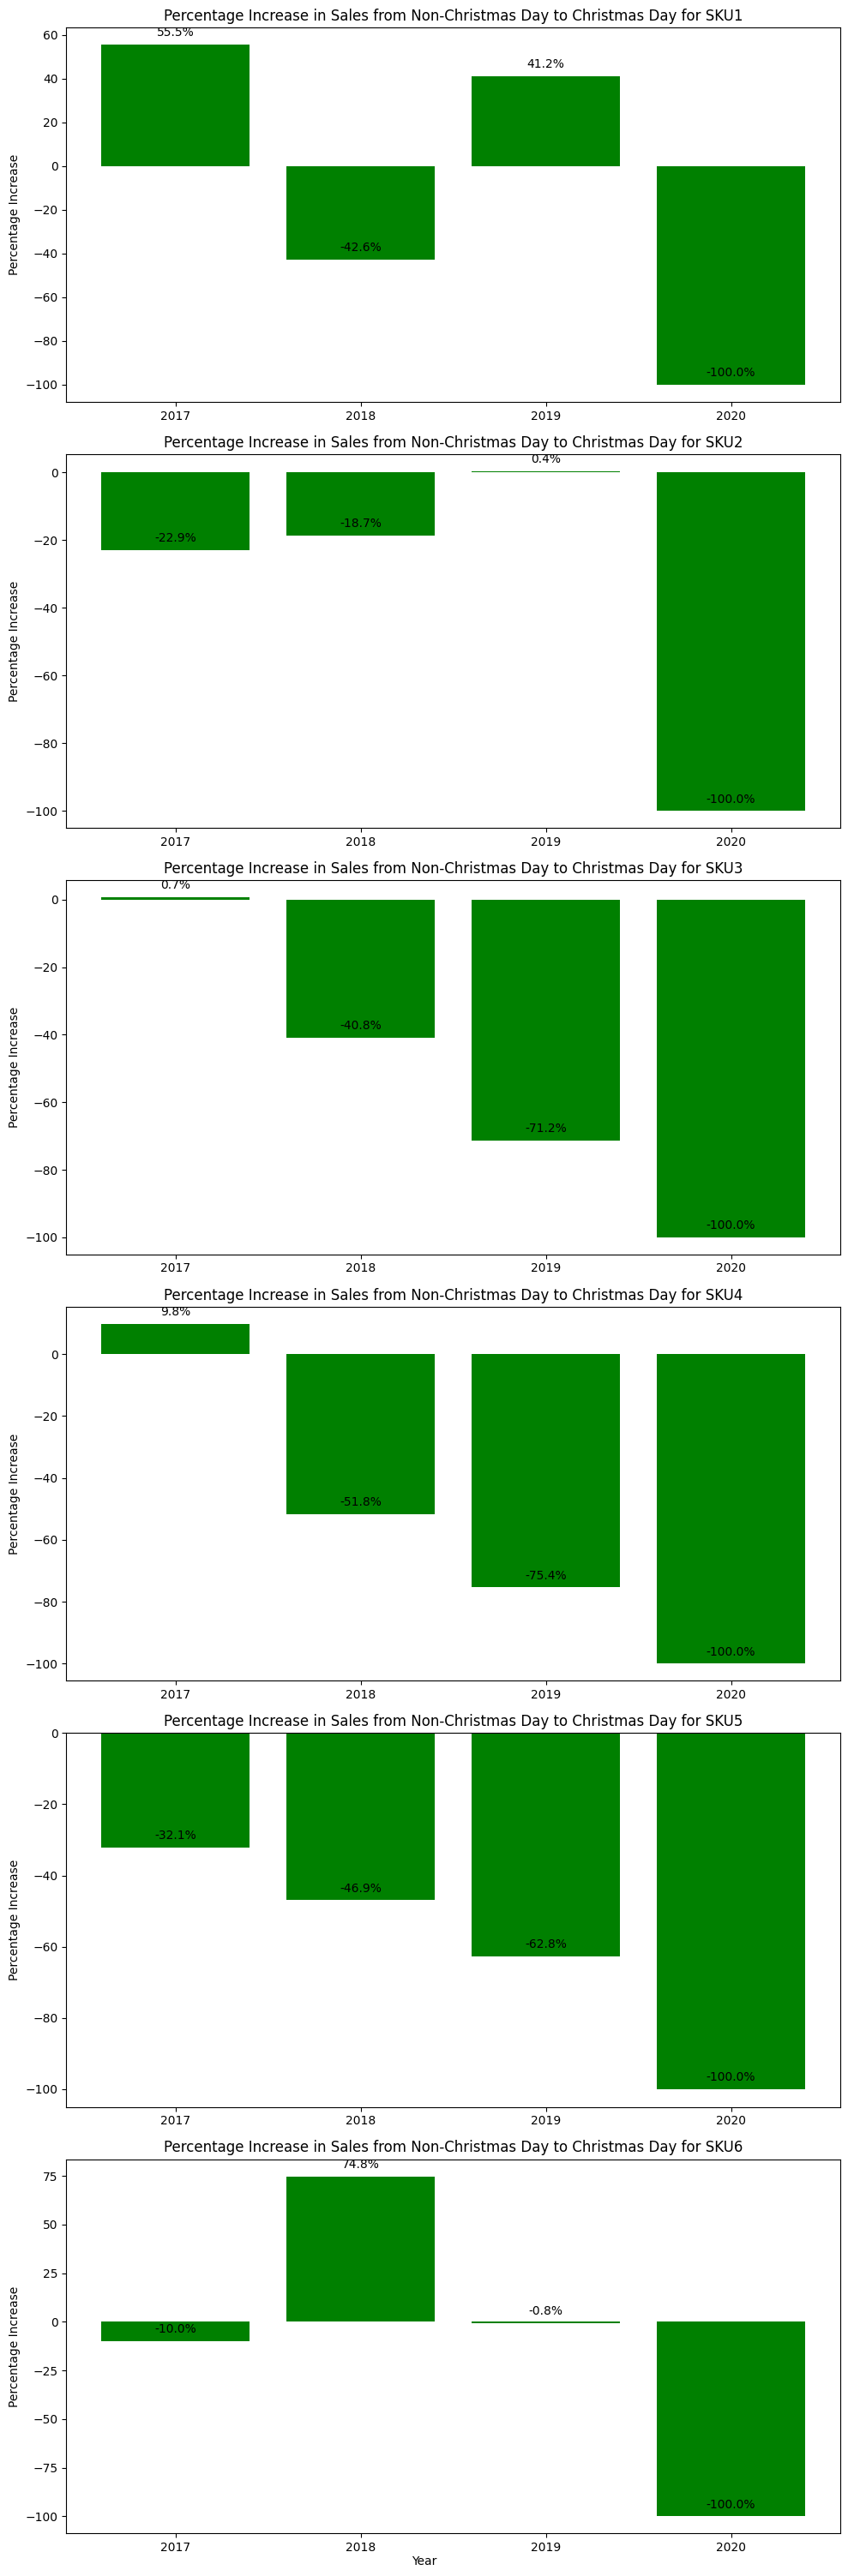

In [562]:
christmas_day_data = data[data['CHRISTMAS'] == 1]
christmas_dates = christmas_day_data['date'].drop_duplicates()

# Function to adjust year based on Christmas
def adjust_year_based_on_christmas(row, christmas_dates):
    past_christmases = christmas_dates[christmas_dates <= row['date']]
    if not past_christmases.empty:
        most_recent_christmas = past_christmases.max()
        # If the current date is after the most recent Christmas, consider it part of the next year
        if row['date'] > most_recent_christmas:
            return row['Year'] + 1
    return row['Year']

# Apply the function to each row in the DataFrame
data['Adjusted_Year'] = data.apply(adjust_year_based_on_christmas, axis=1, christmas_dates=christmas_dates)

# Group and compute mean sales
year_average_sales = data.groupby(['Product', 'Adjusted_Year', 'CHRISTMAS'])['Sales'].mean().unstack()
year_average_sales = year_average_sales.fillna(0)

# Calculate percentage increase from Non-Christmas Day (0) to Christmas Day (1)
percentage_rate = (year_average_sales[1] - year_average_sales[0]) / year_average_sales[0] * 100

percentage_rate = percentage_rate.reset_index()
percentage_rate = percentage_rate[percentage_rate['Adjusted_Year'] != 2021]
percentage_rate.set_index(['Product', 'Adjusted_Year'], inplace=True)
percentage_rate = percentage_rate.squeeze()

# Split the DataFrame by product
products = percentage_rate.index.get_level_values(0).unique()

# Create subplots - assuming 6 products for demonstration
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30), sharex=False)

for i, product in enumerate(products):
    ax = axes[i]
    data_to_plot = percentage_rate.loc[product]
    ax.bar(data_to_plot.index, data_to_plot.values, color='green')
    
    ax.set_title(f'Percentage Increase in Sales from Non-Christmas Day to Christmas Day for {product}')
    ax.set_ylabel('Percentage Increase')

    ax.set_xticks(data_to_plot.index)  
    ax.set_xticklabels(data_to_plot.index)  

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set a common xlabel for the entire figure
fig.text(0.5, 0.002, 'Year', ha='center', va='center')

plt.tight_layout()
plt.savefig('Percentage Increase in Sales from Non-Christmas Day to Christmas Day Each Year.png')
plt.show()

In [563]:
CHRISTMAS = data[data['CHRISTMAS'] == 1]
print(CHRISTMAS[['date', 'Product', 'Sales', 'CHRISTMAS', 'Week']])    

           date Product  Sales  CHRISTMAS  Week
43   2017-12-03    SKU1  66333          1    48
95   2018-12-02    SKU1  59037          1    48
147  2019-12-01    SKU1  73956          1    48
202  2020-12-20    SKU1      0          1    51
247  2017-12-03    SKU2   6270          1    48
299  2018-12-02    SKU2   2781          1    48
351  2019-12-01    SKU2   7690          1    48
406  2020-12-20    SKU2      0          1    51
451  2017-12-03    SKU3  62176          1    48
503  2018-12-02    SKU3  16673          1    48
555  2019-12-01    SKU3  16864          1    48
610  2020-12-20    SKU3      0          1    51
655  2017-12-03    SKU4  20914          1    48
707  2018-12-02    SKU4   3719          1    48
759  2019-12-01    SKU4   4056          1    48
814  2020-12-20    SKU4      0          1    51
859  2017-12-03    SKU5  12363          1    48
911  2018-12-02    SKU5   6095          1    48
963  2019-12-01    SKU5   6516          1    48
1018 2020-12-20    SKU5      0          

In [564]:
year_average_sales

CHRISTMAS                          0        1
Product Adjusted_Year                        
SKU1    2017            42661.813953  66333.0
        2018           102877.250000  59037.0
        2019            52362.058824  73956.0
        2020            53494.686275      0.0
        2021            36283.941176      0.0
SKU2    2017             8136.883721   6270.0
        2018             3419.500000   2781.0
        2019             7661.823529   7690.0
        2020             7712.529412      0.0
        2021             6387.352941      0.0
SKU3    2017            61757.581395  62176.0
        2018            28168.500000  16673.0
        2019            58610.196078  16864.0
        2020            61689.627451      0.0
        2021            46878.960784      0.0
SKU4    2017            19038.790698  20914.0
        2018             7713.500000   3719.0
        2019            16460.784314   4056.0
        2020            17359.274510      0.0
        2021            16866.215686      0.0
SKU5    2017            18201.697674  12363.0
        2018            11486.000000   6095.0
        2019            17512.215686   6516.0
        2020            17273.490196      0.0
        2021            14361.313725      0.0
SKU6    2017            47738.860465  42982.0
        2018            22379.000000  39116.0
        2019            41054.666667  40726.0
        2020            35972.392157      0.0
        2021            28422.326087      0.0

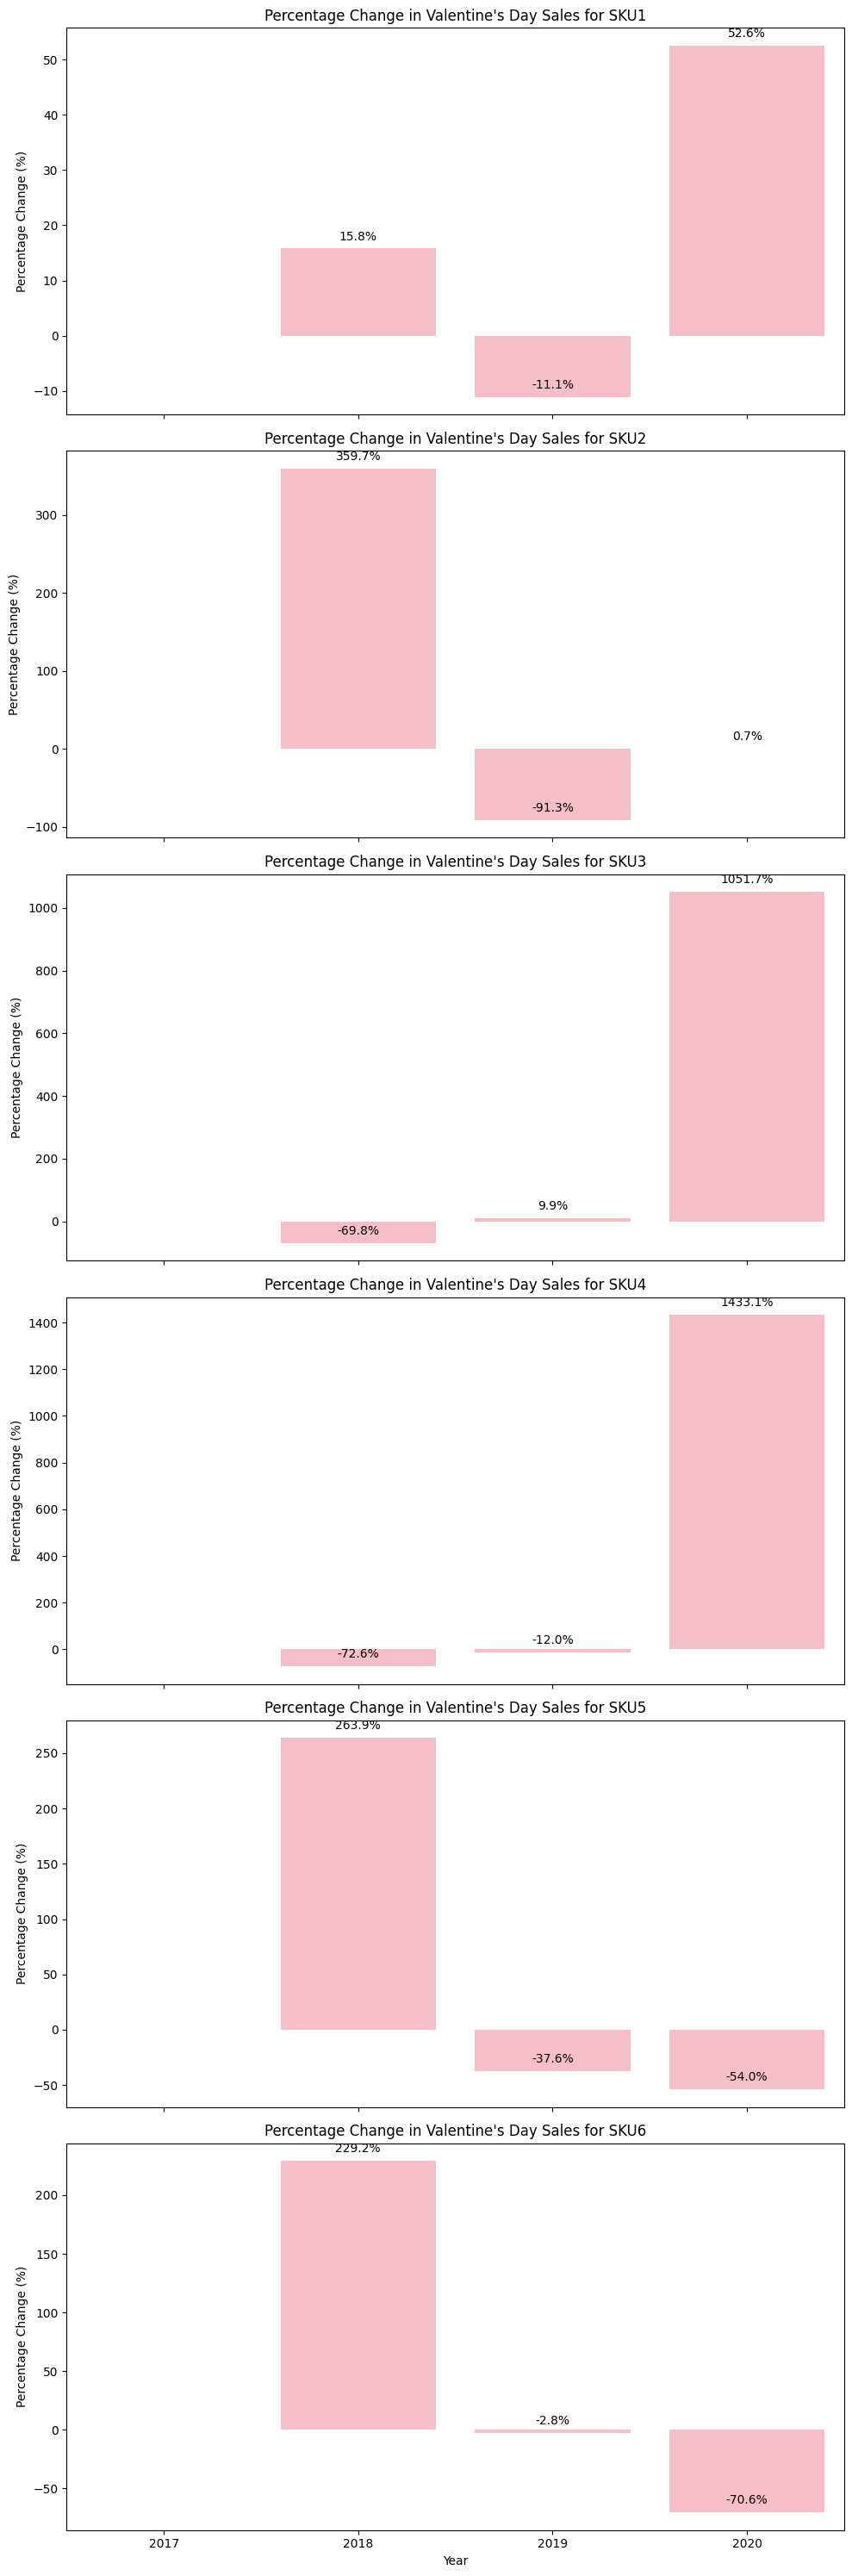

In [565]:
# Group and compute mean sales focusing on V_DAY
year_average_sales = data.groupby(['Product', 'Year', 'V_DAY'])['Sales'].mean().unstack()
year_average_sales = year_average_sales.fillna(0)
valentine_sales = year_average_sales[1]


# Calculate the percentage change for Valentine's Day sales year-over-year for each product
valentine_sales_pct_change = valentine_sales.pct_change()

# Get unique list of products
products = valentine_sales.index.get_level_values('Product').unique()

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30), sharex=True)

# Loop through each product and create a plot
for i, product in enumerate(products):
    ax = axes[i]
    product_data = valentine_sales.loc[product].reset_index()

    product_data['Percentage_Change'] = product_data[1].pct_change() * 100
    

    sns.barplot(data=product_data, x='Year', y='Percentage_Change', ax=ax, color='lightpink')
    
    ax.set_title(f'Percentage Change in Valentine\'s Day Sales for {product}')
    ax.set_ylabel('Percentage Change (%)')  

    for p in ax.patches:
        if not pd.isnull(p.get_height()):  # Check if the value is not NaN
            ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')



plt.tight_layout()
plt.savefig('Percentage Change in Valentine\'s Day Sales for product.png')
plt.show()

In [574]:
valentine_sales

Product  Year
SKU1     2017     29023.0
         2018     33604.0
         2019     29867.0
         2020     45572.0
SKU2     2017      7080.0
         2018     32549.0
         2019      2837.0
         2020      2857.0
SKU3     2017     49090.0
         2018     14822.0
         2019     16284.0
         2020    187548.0
SKU4     2017     15705.0
         2018      4306.0
         2019      3789.0
         2020     58091.0
SKU5     2017      5748.0
         2018     20916.0
         2019     13048.0
         2020      5999.0
SKU6     2017     11659.0
         2018     38384.0
         2019     37295.0
         2020     10955.0
Name: 1, dtype: float64

In [566]:
product_data

,Year,1,Percentage_Change
0,2017,11659.0,NaN
1,2018,38384.0,229.222060
2,2019,37295.0,-2.837120
3,2020,10955.0,-70.626089


In [567]:
valentine_sales_pct_change

Product  Year
SKU1     2017          NaN
         2018     0.157840
         2019    -0.111207
         2020     0.525831
SKU2     2017    -0.844641
         2018     3.597316
         2019    -0.912839
         2020     0.007050
SKU3     2017    16.182359
         2018    -0.698065
         2019     0.098637
         2020    10.517318
SKU4     2017    -0.916261
         2018    -0.725820
         2019    -0.120065
         2020    14.331486
SKU5     2017    -0.901052
         2018     2.638831
         2019    -0.376171
         2020    -0.540236
SKU6     2017     0.943491
         2018     2.292221
         2019    -0.028371
         2020    -0.706261
Name: 1, dtype: float64

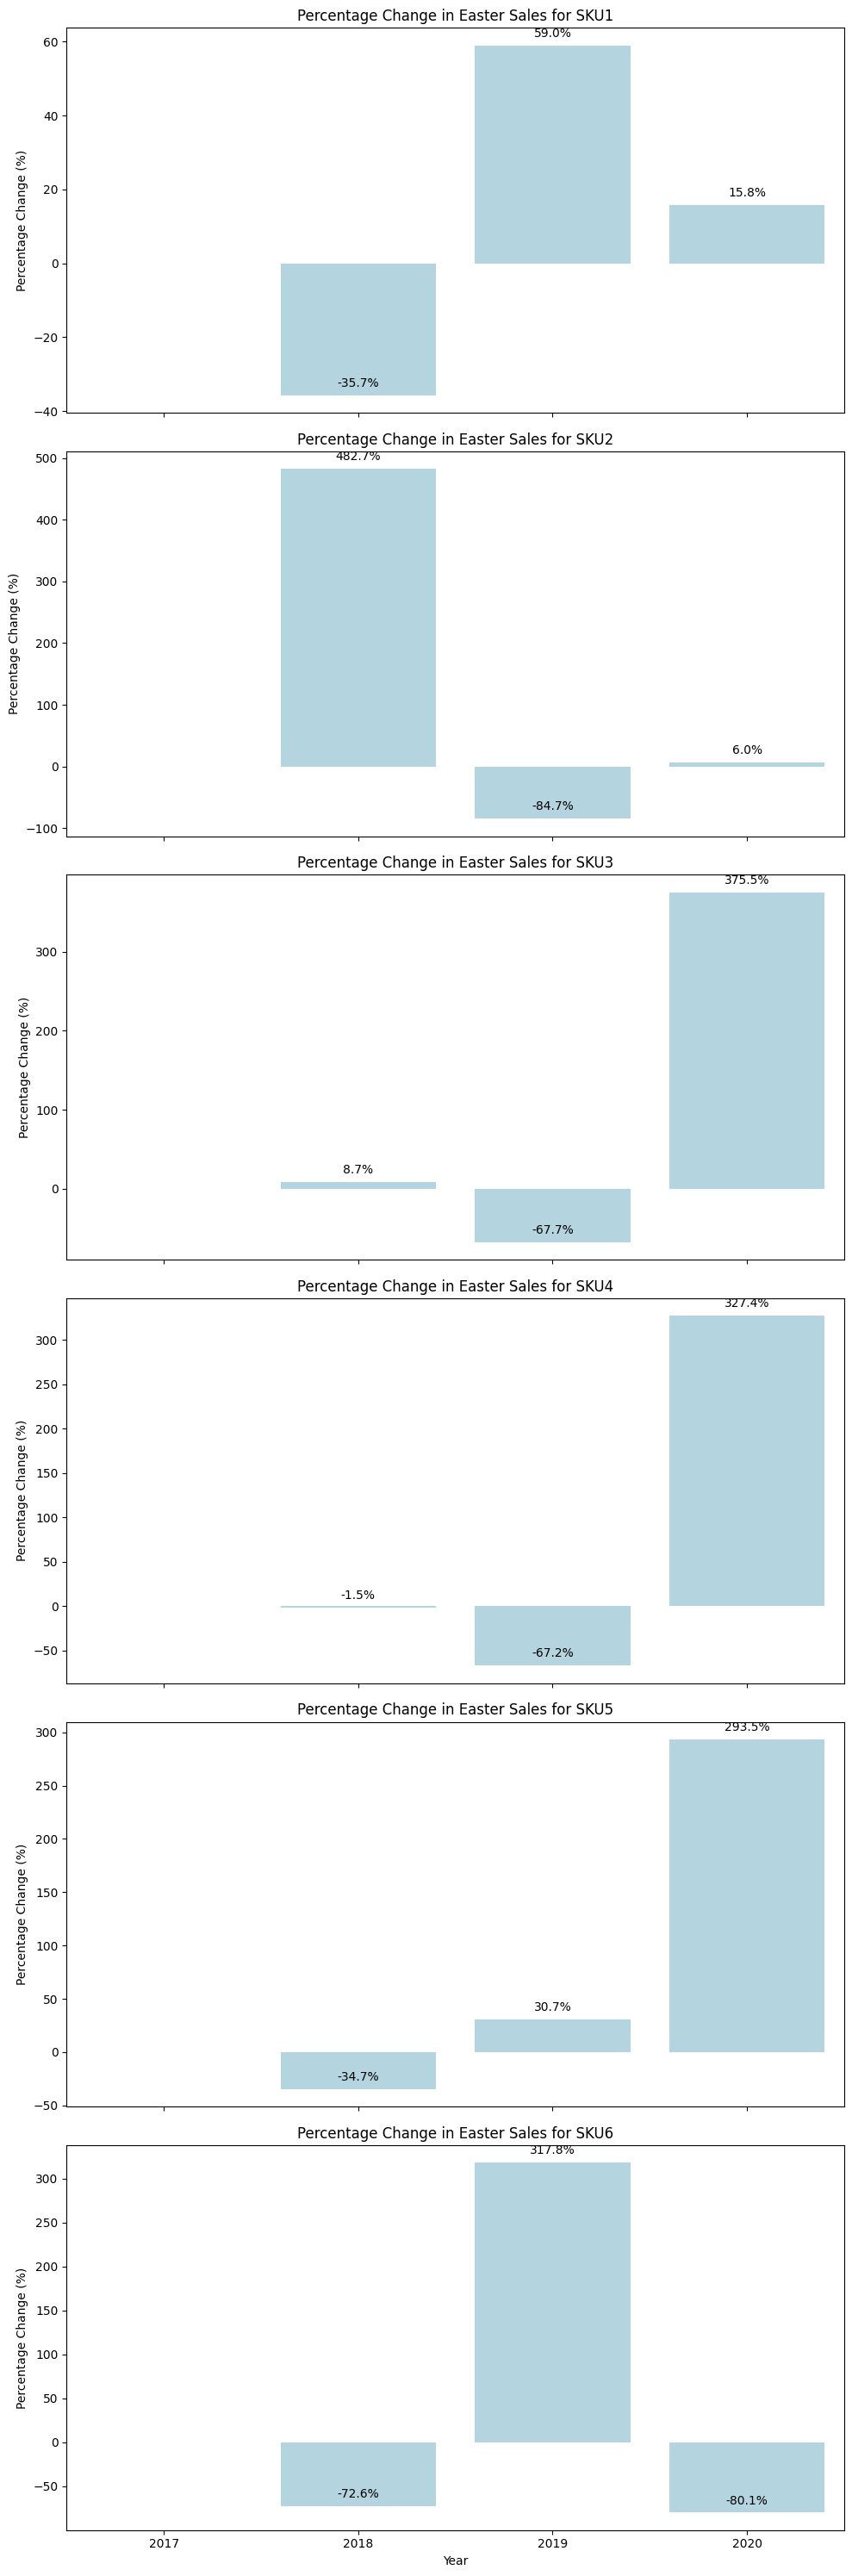

In [568]:
# Group and compute mean sales focusing on Easter
year_average_sales = data.groupby(['Product', 'Year', 'EASTER'])['Sales'].mean().unstack()
year_average_sales = year_average_sales.fillna(0)
easter_sales = year_average_sales[1]

# Calculate the percentage change for Easter Day sales year-over-year for each product
easter_sales_pct_change = easter_sales.pct_change()

# Get unique list of products
products = easter_sales.index.get_level_values('Product').unique()

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30), sharex=True)

# Loop through each product and create a plot
for i, product in enumerate(products):
    ax = axes[i]
    
    product_data = easter_sales.loc[product].reset_index()

    product_data['Percentage_Change'] = product_data[1].pct_change() * 100
    
    # Create the bar plot for the current product
    sns.barplot(data=product_data, x='Year', y='Percentage_Change', ax=ax, color='lightblue')

    ax.set_title(f'Percentage Change in Easter Sales for {product}')
    ax.set_ylabel('Percentage Change (%)')  

    for p in ax.patches:
        if not pd.isnull(p.get_height()):  # Check if the value is not NaN
            ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('Percentage Change in Easter Sales for Each Product.png')
plt.show()

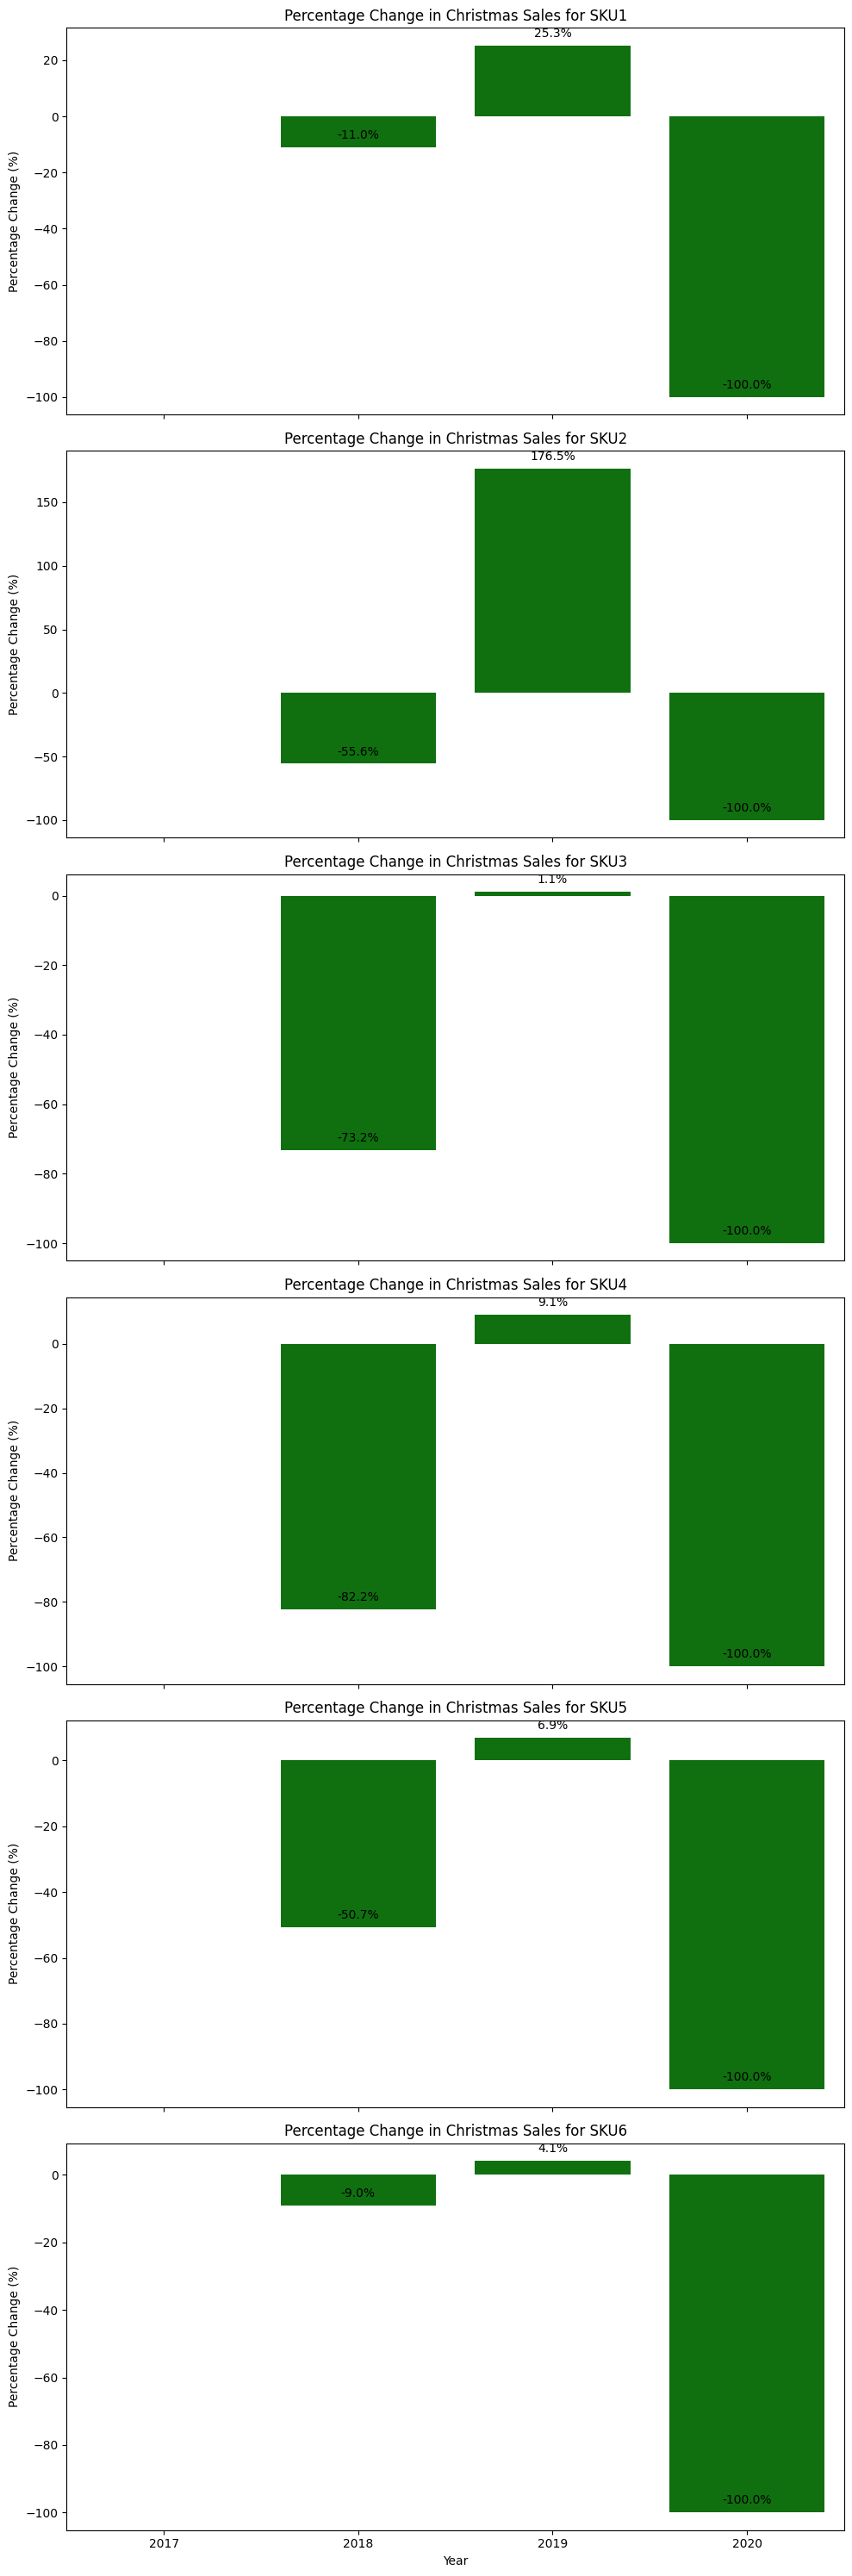

In [569]:
# Group and compute mean sales focusing on CHRISTMAS
year_average_sales = data.groupby(['Product', 'Year', 'CHRISTMAS'])['Sales'].mean().unstack()
year_average_sales = year_average_sales.fillna(0)
christmas_sales = year_average_sales[1]

christmas_sales_pct_change = christmas_sales.pct_change()

# Get unique list of products
products = christmas_sales.index.get_level_values('Product').unique()

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=len(products), ncols=1, figsize=(10, 30), sharex=True)

# Loop through each product and create a plot
for i, product in enumerate(products):
    ax = axes[i]
    product_data = christmas_sales.loc[product].reset_index()
    
    product_data['Percentage_Change'] = product_data[1].pct_change() * 100
    
    # Create the bar plot for the current product
    sns.barplot(data=product_data, x='Year', y='Percentage_Change', ax=ax, color='green')

    ax.set_title(f'Percentage Change in Christmas Sales for {product}')
    ax.set_ylabel('Percentage Change (%)')  

    for p in ax.patches:
        if not pd.isnull(p.get_height()):  # Check if the value is not NaN
            ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig('Percentage Change in Christmas Sales for Each Product.png')
plt.show()

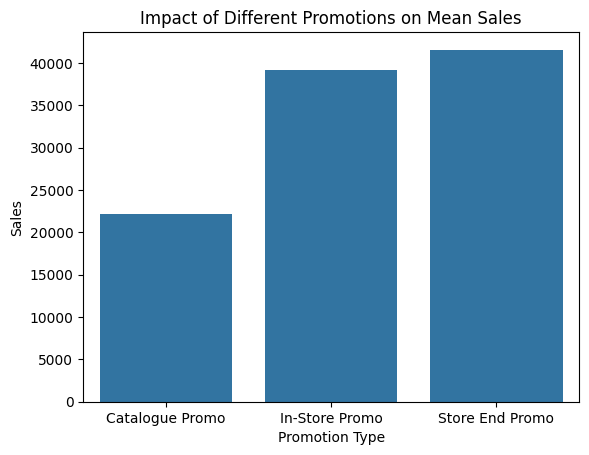

In [570]:
# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = data.melt(id_vars=['Sales'], value_vars=['In-Store Promo', 'Catalogue Promo', 'Store End Promo'], 
                    var_name='Promotion Type', value_name='Promotion Applied')


df_melted = df_melted[df_melted['Promotion Applied'] == 1]
grouped_sales = df_melted.groupby('Promotion Type')['Sales'].mean().reset_index()


sns.barplot(x='Promotion Type', y='Sales', data=grouped_sales)
plt.title('Impact of Different Promotions on Mean Sales')
plt.savefig('Impact of Different Promotions on Mean Sales.png')
plt.show()

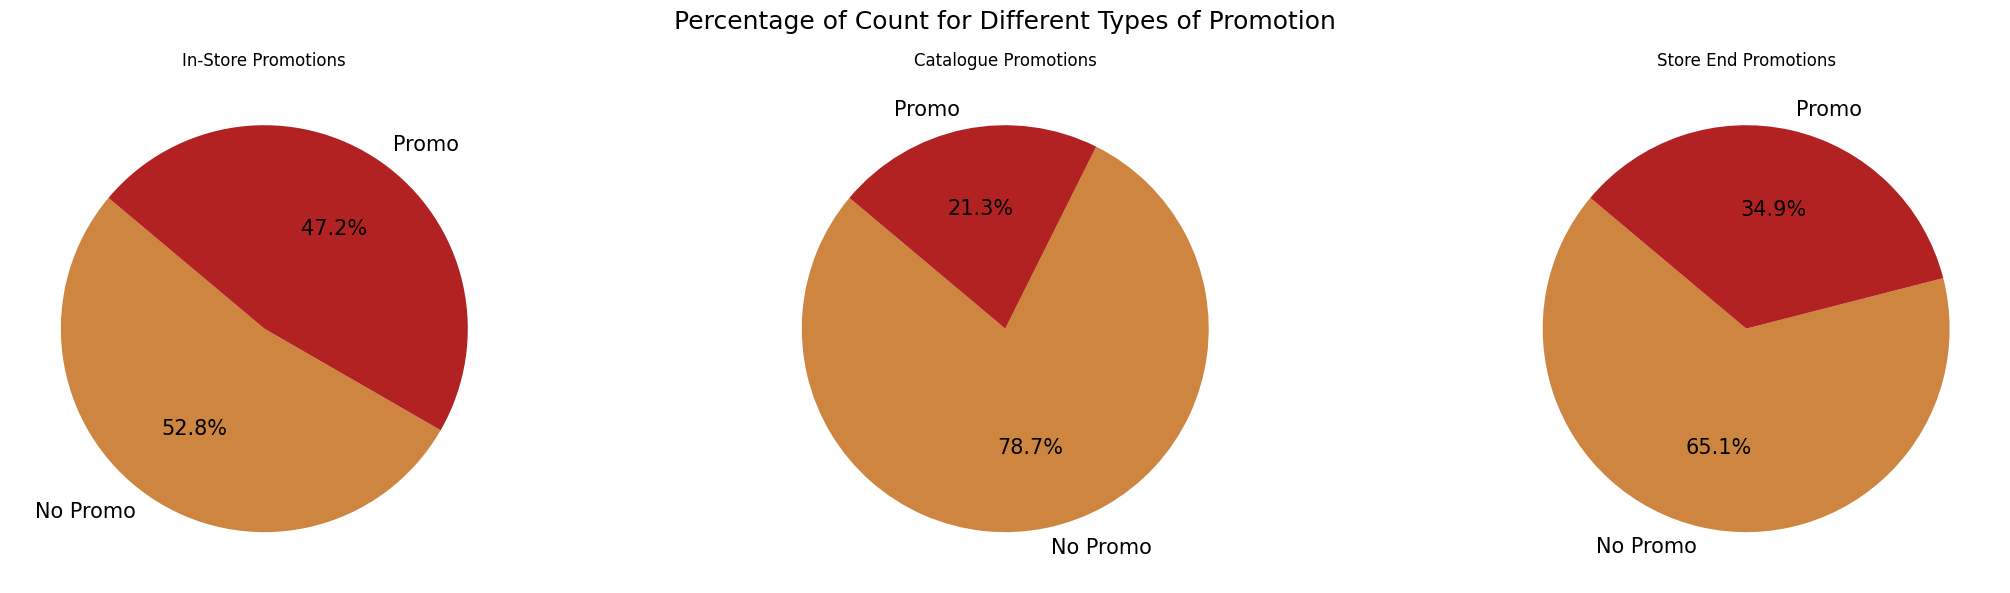

In [579]:
# Pie chart for promotion data
def plot_promo_pie_chart(data, column, ax, title):
    promo_counts = data[column].value_counts(normalize=True)
    
    ax.pie(promo_counts, labels=['No Promo', 'Promo'], autopct=lambda pct: f'{pct:.1f}%', 
           startangle=140, colors=['peru', 'firebrick'], textprops={'fontsize': 15})
    ax.set_title(title)


fig, axs = plt.subplots(1, 3, figsize=(23, 6))

plot_promo_pie_chart(data, 'In-Store Promo', axs[0], 'In-Store Promotions')
plot_promo_pie_chart(data, 'Catalogue Promo', axs[1], 'Catalogue Promotions')
plot_promo_pie_chart(data, 'Store End Promo', axs[2], 'Store End Promotions')

fig.suptitle('Percentage of Count for Different Types of Promotion', fontsize=18)
plt.tight_layout()
plt.savefig('Percentage of Count for Different Type of Promotion.png')
plt.show()

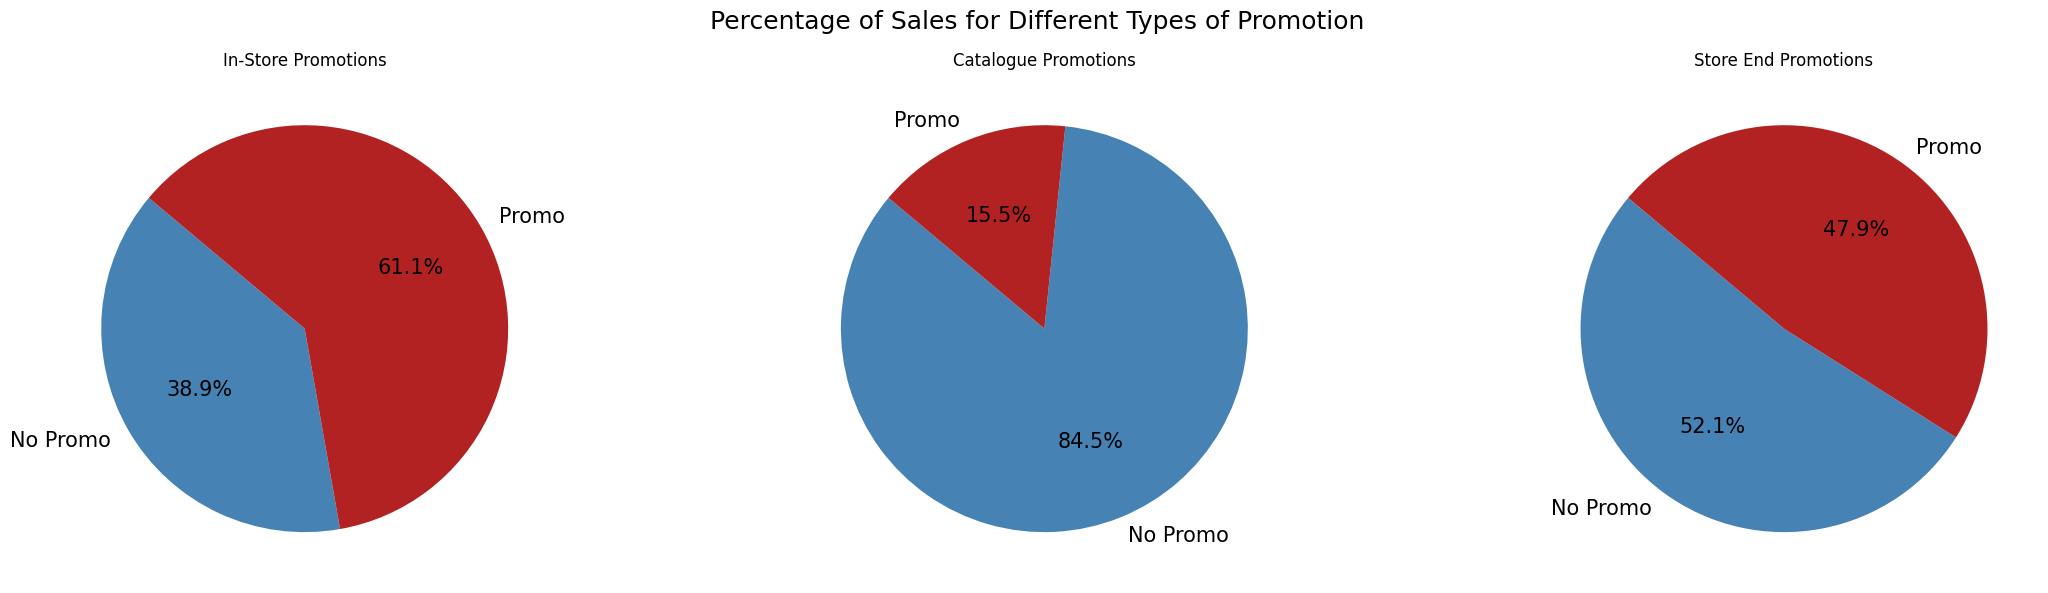

In [580]:
def plot_promo_pie_chart(data, promo_column, ax, title):
    promo_sales_sum = data.groupby(promo_column)['Sales'].sum()
    
    ax.pie(promo_sales_sum, labels=promo_sales_sum.index.map({0: 'No Promo', 1: 'Promo'}), 
           autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=['steelblue', 'firebrick'], 
           textprops={'fontsize': 15})
    ax.set_title(title)


fig, axs = plt.subplots(1, 3, figsize=(23, 6))

plot_promo_pie_chart(data, 'In-Store Promo', axs[0], 'In-Store Promotions')
plot_promo_pie_chart(data, 'Catalogue Promo', axs[1], 'Catalogue Promotions')
plot_promo_pie_chart(data, 'Store End Promo', axs[2], 'Store End Promotions')

fig.suptitle('Percentage of Sales for Different Types of Promotion', fontsize=18)
plt.tight_layout()
plt.savefig('Percentage of Sales for Different Type of Promotion.png')
plt.show()

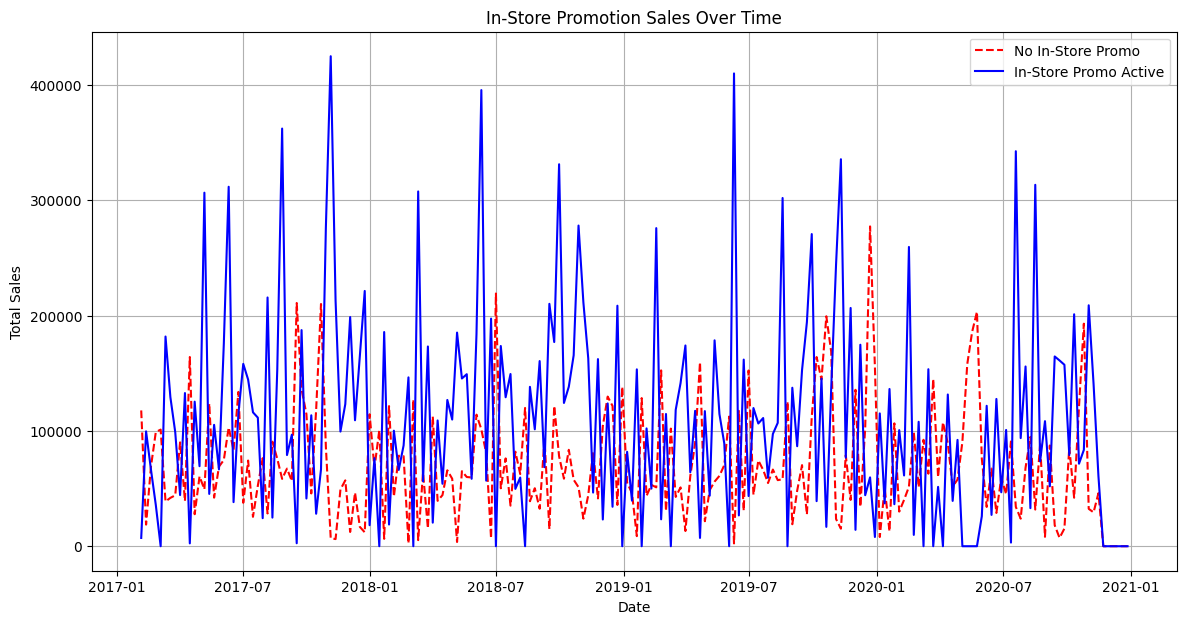

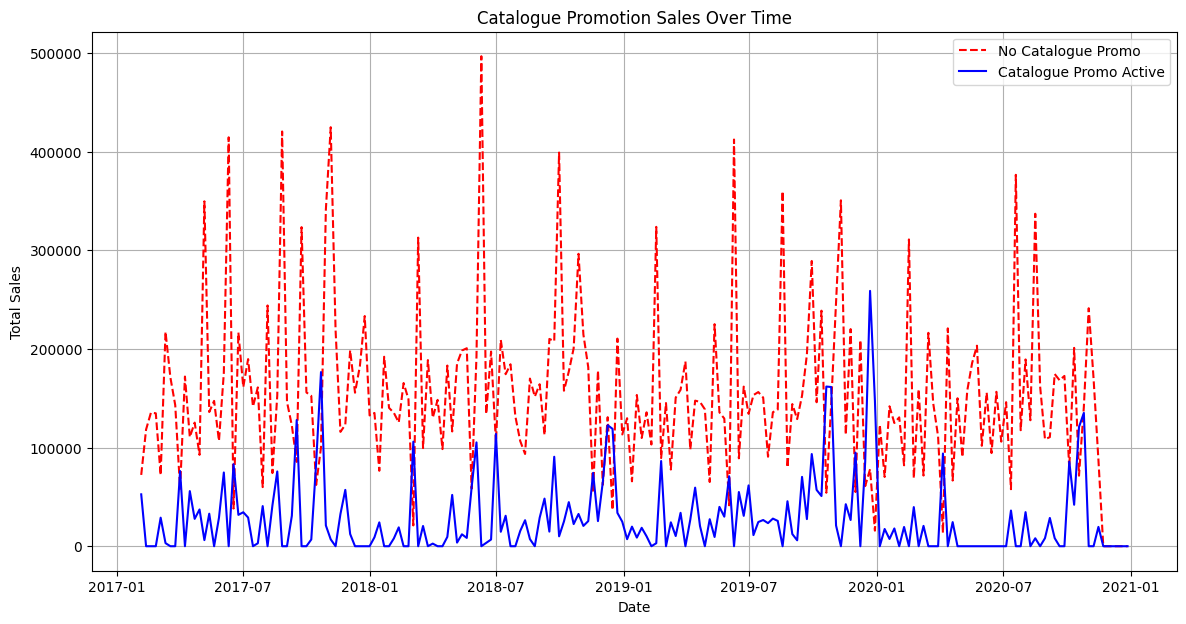

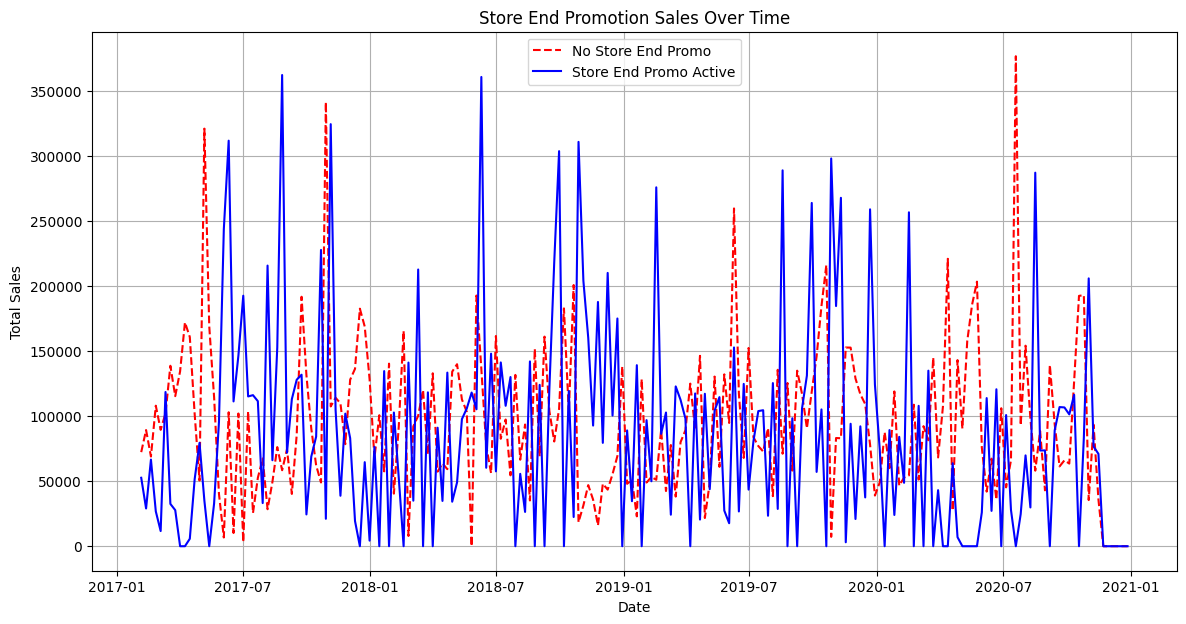

In [573]:
# Sum sales by date and promotion status
def sum_sales_by_promo(data, promo_type):
    return data.groupby(['date', promo_type])['Sales'].sum().unstack(fill_value=0).reset_index()

in_store_sales = sum_sales_by_promo(data, 'In-Store Promo')
catalogue_sales = sum_sales_by_promo(data, 'Catalogue Promo')
store_end_sales = sum_sales_by_promo(data, 'Store End Promo')



def plot_sales_over_time(df, title, promo_label):
    plt.figure(figsize=(14, 7))
    plt.plot(df['date'], df[0], label=f'No {promo_label}', linestyle='--', color='red')
    plt.plot(df['date'], df[1], label=f'{promo_label} Active', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{title}.png')
    plt.show()


# Plotting for each type of promotion
plot_sales_over_time(in_store_sales, 'In-Store Promotion Sales Over Time', 'In-Store Promo')
plot_sales_over_time(catalogue_sales, 'Catalogue Promotion Sales Over Time', 'Catalogue Promo')
plot_sales_over_time(store_end_sales, 'Store End Promotion Sales Over Time', 'Store End Promo')

## Recommendations:
1. Targeted Inventory Management: Align inventory levels with seasonal demand patterns, ensuring higher stock during peak sales periods like Q4 for SKU1 and SKU6, and Q3 for SKU3 and SKU4.

3. Refined Promotional Strategies: Given the indication that catalog promotions may be ineffective, consider reallocating marketing budgets to more effective promotion channels or redesigning the catalog strategy to better capture customer interest.
4. Diversified Product Strategy: For products like SKU2, which show decreased sales during certain holidays, develop strategies to diversify their appeal or bundle them with more popular items.
5. Enhanced Digital Presence: With physical store sales impacted by COVID-19, enhance the online shopping experience and digital presence to capture lost in-store sales and meet changing consumer behaviors.
6. Leverage Data for Forecasting: Use historical sales data to predict future trends and prepare for upcoming seasonal peaks and lows in demand.